# **IAF 603 What influences World Happiness?**


---

In [0]:
# Load Libraries
import pandas as pd # Reads Dataset
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
scaler = preprocessing.StandardScaler()
import seaborn as sns #fancier graphics 
import sqlite3
import plotly.express as px
import plotly.graph_objects as go

In [1471]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# ***1 Load All DataSets***

---

In [0]:
worldhappy17 = pd.read_csv('/content/drive/Shared drives/IAF 603 Final Project/DataSets/CSV_Fmts/World Happiness 2017.csv')
WorldEnvData = pd.read_csv('/content/drive/Shared drives/IAF 603 Final Project/DataSets/CSV_Fmts/World Environmental Data.csv')
CtProfile = pd.read_csv('/content/drive/Shared drives/IAF 603 Final Project/DataSets/CSV_Fmts/country_profiles_modified.csv')
IMF_Nat_Savings17 = pd.read_csv('/content/drive/Shared drives/IAF 603 Final Project/DataSets/CSV_Fmts/IMF_Gross_National_Savings_2017.csv')
IMF_Gov_Exp17 = pd.read_csv('/content/drive/Shared drives/IAF 603 Final Project/DataSets/CSV_Fmts/IMF_General_Government_Total_Expenditure_2017.csv')
CtRg = pd.read_csv('/content/drive/Shared drives/IAF 603 Final Project/DataSets/CSV_Fmts/Country_Region.csv')

## 1.1  Exploring Datasets - head, tail, ndim, shape, and size


### **1.1.1 Countries and Regions - CtRg**

In [1473]:
CtRg.head()

,Country,Region
0,Denmark,Western Europe
1,Switzerland,Western Europe
2,Iceland,Western Europe
3,Norway,Western Europe
4,Finland,Western Europe


In [1474]:
CtRg.tail()

,Country,Region
152,Benin,Sub-Saharan Africa
153,Afghanistan,Southern Asia
154,Togo,Sub-Saharan Africa
155,Syria,Middle East and Northern Africa
156,Burundi,Sub-Saharan Africa


In [1475]:
CtRg.ndim

2

In [1476]:
CtRg.size


314

In [1477]:
CtRg.shape

(157, 2)

### **1.1.2 Country Profiles  - CtProfile**

In [1478]:
CtProfile.head()

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),Employment: Agriculture (% of employed),Employment: Industry (% of employed),Employment: Services (% of employed),Unemployment (% of labour force),Labour force participation (female/male pop. %),Agricultural production index (2004-2006=100),Food production index (2004-2006=100),International trade: Exports (million US$),International trade: Imports (million US$),International trade: Balance (million US$),"Balance of payments, current account (million US$)",Population growth rate (average annual %),Urban population (% of total population),Urban population growth rate (average annual %),"Fertility rate, total (live births per woman)","Life expectancy at birth (females/males, years)","Population age distribution (0-14 / 60+ years, %)",International migrant stock (000/% of total pop.),Refugees and others of concern to UNHCR (in thousands),Infant mortality rate (per 1000 live births,Health: Total expenditure (% of GDP),Health: Physicians (per 1000 pop.),Education: Government expenditure (% of GDP),Education: Primary gross enrol. ratio (f/m per 100 pop.),Education: Secondary gross enrol. ratio (f/m per 100 pop.),Education: Tertiary gross enrol. ratio (f/m per 100 pop.),Seats held by women in national parliaments %,Mobile-cellular subscriptions (per 100 inhabitants),Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI),Unnamed: 49
0,Afghanistan,SouthernAsia,652864,35530,54.4,106.3,20270,-2.4,623.2,23.3,23.3,53.3,61.6,10,28.5,8.6,19.3/83.6,125,125,1458,3568,-2110,-5121,3.2,26.7,4,5.3,63.5/61.0,43.2/4.1,382.4/1.2,1513.1,68.6,8.2,0.3,3.3,91.1/131.6,39.7/70.7,3.7/13.3,27.7,61.6,8.3,42,2.1,9.8/0.3,63,5,78.2/47.0,45.1/27.0,21.43,-99
1,Albania,SouthernEurope,28748,2930,106.9,101.9,11541,2.6,3984.2,22.4,26.0,51.7,41.4,18.3,40.3,15.8,40.2/61.0,134,134,1962,4669,-2707,-1222,-0.1,57.4,2.2,1.7,79.9/75.6,17.4/19.0,57.6/2.0,8.8,14.6,5.9,1.3,3.5,111.7/115.5,92.5/98.8,68.1/48.7,22.9,106.4,63.3,130,28.2,5.7/2.0,84,36,94.9/95.2,95.5/90.2,2.96,-99
2,Algeria,NorthernAfrica,2381741,41318,17.3,102.0,164779,3.8,4154.1,12.2,37.3,50.5,10.8,34.5,54.7,11.4,17.0/70.7,160,161,29992,47091,-17099,-27229,2,70.7,2.8,3,76.5/74.1,29.3/9.4,242.4/0.6,99.8,27.7,7.2,...,...,112.7/119.5,101.7/98.1,45.1/28.9,31.6,113,38.2,135,0.8,145.4/3.7,5900,55,84.3/81.8,89.8/82.2,0.05,-99
3,American Samoa,Polynesia,199,56,278.2,103.6,-99,-99,-99.0,-99,-99.0,-99.0,...,...,...,...,.../...,112,112,-99,-99,-99,-99,-~0.0,87.2,-0.1,2.6,77.8/71.1,33.3/9.0,23.2/41.8,-99,9.6,-99.0,-99,-99,-99,-99,-99,-99.0,...,-99,92,87.9,-99,-99,-99,100.0/100.0,62.5/62.5,-99,-99
4,Andorra,SouthernEurope,468,77,163.8,102.3,2812,0.8,39896.4,0.5,10.8,88.6,-99,-99,-99,-99,-99,-99,-99,100,1355,-1255,-99,-1.6,85.1,0.1,1.2,-99,14.4/19.0,42.1/59.7,-99,-99,8.1,3.7,3.3,-99,-99,-99,32.1,88.1,96.9,13,34,0.5/6.4,1,119,100.0/100.0,100.0/100.0,-99,-99


In [1479]:
CtProfile.tail()

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),Employment: Agriculture (% of employed),Employment: Industry (% of employed),Employment: Services (% of employed),Unemployment (% of labour force),Labour force participation (female/male pop. %),Agricultural production index (2004-2006=100),Food production index (2004-2006=100),International trade: Exports (million US$),International trade: Imports (million US$),International trade: Balance (million US$),"Balance of payments, current account (million US$)",Population growth rate (average annual %),Urban population (% of total population),Urban population growth rate (average annual %),"Fertility rate, total (live births per woman)","Life expectancy at birth (females/males, years)","Population age distribution (0-14 / 60+ years, %)",International migrant stock (000/% of total pop.),Refugees and others of concern to UNHCR (in thousands),Infant mortality rate (per 1000 live births,Health: Total expenditure (% of GDP),Health: Physicians (per 1000 pop.),Education: Government expenditure (% of GDP),Education: Primary gross enrol. ratio (f/m per 100 pop.),Education: Secondary gross enrol. ratio (f/m per 100 pop.),Education: Tertiary gross enrol. ratio (f/m per 100 pop.),Seats held by women in national parliaments %,Mobile-cellular subscriptions (per 100 inhabitants),Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI),Unnamed: 49
224,Wallis and Futuna Islands,Polynesia,142,12,84.1,93.4,-99,-99,-99.0,-99,-99.0,-99.0,-99,-99,-99,-99,-99,115,115,1,53,-51,-99,-2.1,0.0,0,2.1,78.7/72.8,25.5/15.4,2.8/21.7,-99,...,-99.0,-99,-99,-99,-99,-99,-99.0,-99,9,89,41.6,~0.0/1.6,-99,26,-99,-99,-99,-99
225,Western Sahara,NorthernAfrica,266000,553,2.1,110.1,-99,-99,-99.0,-99,-99.0,-99.0,37.4,27.9,34.7,6.8,28.6/83.3,100,100,-99,-99,-99,-99,1.8,80.9,3.3,2.6,70.3/66.9,28.1/5.4,5.2/0.9,-99,34.1,-99.0,-99,-99,-99,-99,-99,-99.0,-99,-99,49,2.7,-99,-99,-99,-99,-99,-99,-99
226,Yemen,WesternAsia,527968,28250,53.5,102.1,29688,-28.1,1106.4,14.7,36.9,48.4,32.9,17.9,49.2,16.1,26.2/73.7,136,137,570,6861,-6291,-3026,2.6,34.6,4,4.4,65.6/62.8,39.9/4.6,344.1/1.3,3371.4,47.2,5.6,0.3,...,88.9/105.7,39.5/57.4,6.1/13.7,0.0,68,25.1,298,1,22.7/0.9,668,12,72.0/46.5,92.5/34.1,2.99,-99
227,Zambia,EasternAfrica,752612,17094,23.0,98.5,21255,2.9,1311.1,8.2,32.3,59.5,54.8,9.9,35.3,7.4,69.9/80.9,179,180,6505,7442,-937,-768,3,40.9,4.3,5.2,61.9/57.5,44.8/3.7,127.9/0.8,55.3,53.8,5.0,0.2,...,104.0/103.3,-99,3.4/4.5,18.0,74.5,21,88,65.6,4.5/0.3,374,26,85.6/51.3,55.6/35.7,3.96,-99
228,Zimbabwe,EasternAfrica,390757,16530,42.7,95.0,13893,1.1,890.4,13,30.5,56.5,67.5,7.3,25.2,5,78.0/87.5,99,98,2832,5212,-2379,-1521,2.3,32.4,2.3,4,59.0/56.1,41.2/4.2,398.9/2.6,308.6,46.5,6.0,0.1,8.4,99.1/100.8,47.1/48.1,8.0/8.9,32.6,84.8,16.4,89,37.2,12.0/0.8,482,30,97.0/67.3,49.3/30.8,6,-99


In [1480]:
CtProfile.size

11450

In [1481]:
CtProfile.ndim

2

In [1482]:
CtProfile.shape

(229, 50)

### **1.1.3 World Happiness 2017 Data - worldhappy17**

In [1483]:
worldhappy17.head()

,Country,Happiness_Rank,Happiness_Score,Whisker_high,Whisker_low,Economy_GDP_per_Capita,Family,Health_Life_Expectancy,Freedom,Generosity,Trust_Government_Corruption,Dystopia_Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [1484]:
worldhappy17.tail()

,Country,Happiness_Rank,Happiness_Score,Whisker_high,Whisker_low,Economy_GDP_per_Capita,Family,Health_Life_Expectancy,Freedom,Generosity,Trust_Government_Corruption,Dystopia_Residual
150,Rwanda,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061
151,Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574
152,Tanzania,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130
153,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024
154,Central African Republic,155,2.693,2.864884,2.521116,0.000000,0.000000,0.018773,0.270842,0.280876,0.056565,2.066005


In [1485]:
worldhappy17.size

1860

In [1486]:
worldhappy17.shape

(155, 12)

In [1487]:
worldhappy17.ndim

2

### **1.1.4 World Environmental Data - WorldEnvDat**

In [1488]:
WorldEnvData.head()


,Country,accessibility_to_cities,elevation,aspect,slope,cropland_cover,tree_canopy_cover,isothermality,rain_coldestQuart,rain_driestMonth,rain_driestQuart,rain_mean_annual,rain_seasonailty,rain_warmestQuart,rain_wettestMonth,rain_wettestQuart,temp_annual_range,temp_coldestQuart,temp_diurnal_range,temp_driestQuart,temp_max_warmestMonth,temp_mean_annual,temp_min_coldestMonth,temp_seasonality,temp_warmestQuart,temp_wettestQuart,wind,cloudiness
0,Russia,2143.587912,448.533542,178.456969,0.486310,7.381210,20.356473,19.351714,63.279186,15.345187,52.450745,434.729235,49.685742,181.575443,69.307804,184.997820,50.631191,-24.743686,9.922328,-19.847401,19.952679,-6.261876,-30.678512,145.221422,12.206959,11.549561,3.013606,210.990816
1,United States of America,638.757539,759.251226,166.560382,0.529687,19.743870,16.728462,32.952882,141.820680,28.787362,100.500560,671.911733,43.415171,198.817687,93.486073,249.429018,39.053796,-5.388305,12.751939,1.420303,26.776731,6.602248,-12.277065,93.460602,18.518984,13.579272,3.586282,180.274639
2,Canada,3220.715175,508.284763,169.290792,0.397220,3.796340,20.587476,19.862863,80.937465,19.612252,66.220983,453.318423,46.837965,161.861002,64.995707,177.361250,45.963724,-23.193780,9.232454,-19.120410,16.428661,-6.831690,-29.535063,128.934783,9.503740,7.649331,3.378886,231.498702
3,Antarctica,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,302.807829
4,Indonesia,504.884807,342.053688,168.270799,0.909755,13.240866,55.478882,84.942402,673.078720,136.174030,449.847542,2728.355157,29.436566,677.470571,326.216210,904.111711,10.004346,24.396248,8.508100,24.827528,30.133801,24.993327,20.129455,4.163968,25.392019,24.934237,1.366648,293.095107


In [1489]:
WorldEnvData.tail()

,Country,accessibility_to_cities,elevation,aspect,slope,cropland_cover,tree_canopy_cover,isothermality,rain_coldestQuart,rain_driestMonth,rain_driestQuart,rain_mean_annual,rain_seasonailty,rain_warmestQuart,rain_wettestMonth,rain_wettestQuart,temp_annual_range,temp_coldestQuart,temp_diurnal_range,temp_driestQuart,temp_max_warmestMonth,temp_mean_annual,temp_min_coldestMonth,temp_seasonality,temp_warmestQuart,temp_wettestQuart,wind,cloudiness
238,Saint Barthelemy,645.80000,7.117647,63.529412,0.0,0.0,13.0,64.472688,164.512988,46.243420,163.718646,1038.967122,32.924704,315.440320,128.127437,374.080719,8.918813,25.228696,5.777396,25.470409,31.062595,26.770146,22.143781,11.262728,27.970133,27.481434,NaN,186.622794
239,Pitcairn Islands,15531.33333,1.456311,63.349515,0.0,0.0,NaN,NaN,NaN,102.444357,324.555630,1418.125000,10.680641,NaN,142.250000,375.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212.012500
240,Ashmore and Cartier Islands,NaN,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162.287500
241,Macau S.A.R,2.00000,49.000000,22.000000,0.0,0.0,6.0,31.689777,99.827560,25.724205,94.258568,1785.830688,72.465477,859.451538,324.292847,866.931885,20.482774,15.693074,6.556904,17.475818,32.058582,22.648241,11.575807,50.406709,28.306848,27.631000,3.757483,272.150000
242,Vatican,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1490]:
WorldEnvData.size


6804

In [1491]:
WorldEnvData.shape

(243, 28)

In [1492]:
WorldEnvData.ndim

2

### **1.1.5 IMF National Savings Rate 2017 - IMF_Nat_Savings17**

In [1493]:
IMF_Nat_Savings17.head()

,Country,Units,Scale,Savings
0,Afghanistan,Percent of GDP,NaN,22.348
1,Albania,Percent of GDP,NaN,17.031
2,Algeria,Percent of GDP,NaN,37.708
3,Angola,Percent of GDP,NaN,23.351
4,Antigua and Barbuda,Percent of GDP,NaN,16.102


In [1494]:
IMF_Nat_Savings17.tail()

,Country,Units,Scale,Savings
166,Uzbekistan,Percent of GDP,NaN,26.930
167,Venezuela,Percent of GDP,NaN,-9.864
168,Vietnam,Percent of GDP,NaN,28.704
169,Yemen,Percent of GDP,NaN,1.919
170,Zambia,Percent of GDP,NaN,39.321


In [1495]:
IMF_Nat_Savings17.size

684

In [1496]:
IMF_Nat_Savings17.shape

(171, 4)

In [1497]:
IMF_Nat_Savings17.ndim

2

### **1.1.6 IMF Government Expenditures 2017 - IMF_Gov_Exp17**

In [1498]:
IMF_Gov_Exp17.head()

,Country,Subject Descriptor,Units,Scale,Expense
0,Afghanistan,General government total expenditure,Percent of GDP,NaN,25.878
1,Albania,General government total expenditure,Percent of GDP,NaN,29.137
2,Algeria,General government total expenditure,Percent of GDP,NaN,39.205
3,Angola,General government total expenditure,Percent of GDP,NaN,23.806
4,Antigua and Barbuda,General government total expenditure,Percent of GDP,NaN,23.243


In [1499]:
IMF_Gov_Exp17.tail()

,Country,Subject Descriptor,Units,Scale,Expense
189,Venezuela,General government total expenditure,Percent of GDP,NaN,36.569
190,Vietnam,General government total expenditure,Percent of GDP,NaN,29.224
191,Yemen,General government total expenditure,Percent of GDP,NaN,9.136
192,Zambia,General government total expenditure,Percent of GDP,NaN,25.188
193,Zimbabwe,General government total expenditure,Percent of GDP,NaN,22.484


In [1500]:
IMF_Gov_Exp17.ndim

2

In [1501]:
IMF_Gov_Exp17.shape

(194, 5)

In [1502]:
IMF_Gov_Exp17.size

970

# ***2 Data Cleanup***

---

## 2.1 Cleaning World Happiness Dataset

In [1503]:
# This block of code can be used in order to clean up unwanted punctuation
list(worldhappy17.columns)
worldhappy17.replace(' ',np.nan,inplace=True)
worldhappy17.replace('NDA',np.nan,inplace=True)
worldhappy17.replace('%',np.nan,inplace=True)
worldhappy17.head()

,Country,Happiness_Rank,Happiness_Score,Whisker_high,Whisker_low,Economy_GDP_per_Capita,Family,Health_Life_Expectancy,Freedom,Generosity,Trust_Government_Corruption,Dystopia_Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [0]:
#need to drop all columns except Country, Happiness_Rank and Happiness_Score

## 2.2 Cleaning WorldEnvData




In [0]:
pd.set_option('display.max_rows', None)

In [1506]:
list(WorldEnvData.columns)

['Country',
 'accessibility_to_cities',
 'elevation',
 'aspect',
 'slope',
 'cropland_cover',
 'tree_canopy_cover',
 'isothermality',
 'rain_coldestQuart',
 'rain_driestMonth',
 'rain_driestQuart',
 'rain_mean_annual',
 'rain_seasonailty',
 'rain_warmestQuart',
 'rain_wettestMonth',
 'rain_wettestQuart',
 'temp_annual_range',
 'temp_coldestQuart',
 'temp_diurnal_range',
 'temp_driestQuart',
 'temp_max_warmestMonth',
 'temp_mean_annual',
 'temp_min_coldestMonth',
 'temp_seasonality',
 'temp_warmestQuart',
 'temp_wettestQuart',
 'wind',
 'cloudiness']

### 2.2.1 Drop Columns

In [0]:
# Dropping columns from WorldEnvData.
WorldEnvData.drop(labels=[
 'aspect',
 'slope',
 'elevation',
 'isothermality',
 'rain_coldestQuart',
 'rain_driestMonth',
 'rain_driestQuart',
 'rain_seasonailty',
 'rain_warmestQuart',
 'rain_wettestMonth',
 'rain_wettestQuart',
 'temp_coldestQuart',
 'temp_diurnal_range',
 'temp_driestQuart',
 'temp_seasonality',
 'temp_warmestQuart',
 'temp_wettestQuart',
 'cropland_cover',
 'temp_annual_range',
 'temp_max_warmestMonth',
 'temp_min_coldestMonth',
 'wind'], inplace=True, axis=1)

In [1508]:
list(WorldEnvData.columns)

['Country',
 'accessibility_to_cities',
 'tree_canopy_cover',
 'rain_mean_annual',
 'temp_mean_annual',
 'cloudiness']

## 2.3 Cleaning Country Profile

In [1509]:
list(CtProfile.columns)

['country',
 'Region',
 'Surface area (km2)',
 'Population in thousands (2017)',
 'Population density (per km2, 2017)',
 'Sex ratio (m per 100 f, 2017)',
 'GDP: Gross domestic product (million current US$)',
 'GDP growth rate (annual %, const. 2005 prices)',
 'GDP per capita (current US$)',
 'Economy: Agriculture (% of GVA)',
 'Economy: Industry (% of GVA)',
 'Economy: Services and other activity (% of GVA)',
 'Employment: Agriculture (% of employed)',
 'Employment: Industry (% of employed)',
 'Employment: Services (% of employed)',
 'Unemployment (% of labour force)',
 'Labour force participation (female/male pop. %)',
 'Agricultural production index (2004-2006=100)',
 'Food production index (2004-2006=100)',
 'International trade: Exports (million US$)',
 'International trade: Imports (million US$)',
 'International trade: Balance (million US$)',
 'Balance of payments, current account (million US$)',
 'Population growth rate (average annual %)',
 'Urban population (% of total populat

### **2.3.1 Split Out Merged Values within Single Columns**

In [0]:
split = CtProfile["International migrant stock (000/% of total pop.)"].str.split("/", n = 1, expand = True) 
CtProfile["000"]= split[0]
CtProfile["International migrant stock % Total Population"]= split[1]

In [0]:
split2 = CtProfile["Pop. using improved sanitation facilities (urban/rural, %)"].str.split("/", n = 1, expand = True) 
CtProfile["Urban Population using improved sanitation facilities %"]= split2[0]
CtProfile["Rural Population using improved sanitation facilities %"]= split2[1]

In [0]:
split3 = CtProfile["Life expectancy at birth (females/males, years)"].str.split("/", n = 1, expand = True) 
CtProfile["Life Expectancy At Birth Females Years"]= split3[0]
CtProfile["Life Expectancy At Birth Males Years"]= split3[1]

In [0]:
split4 = CtProfile["Education: Tertiary gross enrol. ratio (f/m per 100 pop.)"].str.split("/", n = 1, expand = True) 
CtProfile["Tertiary gross enrol female"]= split4[0]
CtProfile["Tertiary gross enrol male"]= split4[1]

In [0]:
split5 = CtProfile["CO2 emission estimates (million tons/tons per capita)"].str.split("/", n = 1, expand = True) 
CtProfile["CO2 emissions (tons per capita)"]= split5[1]

In [1515]:
list(CtProfile.columns)

['country',
 'Region',
 'Surface area (km2)',
 'Population in thousands (2017)',
 'Population density (per km2, 2017)',
 'Sex ratio (m per 100 f, 2017)',
 'GDP: Gross domestic product (million current US$)',
 'GDP growth rate (annual %, const. 2005 prices)',
 'GDP per capita (current US$)',
 'Economy: Agriculture (% of GVA)',
 'Economy: Industry (% of GVA)',
 'Economy: Services and other activity (% of GVA)',
 'Employment: Agriculture (% of employed)',
 'Employment: Industry (% of employed)',
 'Employment: Services (% of employed)',
 'Unemployment (% of labour force)',
 'Labour force participation (female/male pop. %)',
 'Agricultural production index (2004-2006=100)',
 'Food production index (2004-2006=100)',
 'International trade: Exports (million US$)',
 'International trade: Imports (million US$)',
 'International trade: Balance (million US$)',
 'Balance of payments, current account (million US$)',
 'Population growth rate (average annual %)',
 'Urban population (% of total populat

### 2.3.2 Drop Columns

In [0]:
# Dropping columns from CtProfile
CtProfile.drop(labels=[
 'Region',
 'Surface area (km2)',
 'Population growth rate (average annual %)',
 'Population density (per km2, 2017)',
 'Sex ratio (m per 100 f, 2017)',
 'GDP: Gross domestic product (million current US$)',
 'GDP growth rate (annual %, const. 2005 prices)',
 'Balance of payments, current account (million US$)',
 'Economy: Agriculture (% of GVA)',
 'Economy: Industry (% of GVA)',
 'Economy: Services and other activity (% of GVA)',
 'Employment: Agriculture (% of employed)',
 'Employment: Industry (% of employed)',
 'Employment: Services (% of employed)',
 'Agricultural production index (2004-2006=100)',
 'Food production index (2004-2006=100)',
 'International trade: Exports (million US$)',
 'International trade: Imports (million US$)',
 'International trade: Balance (million US$)',
 'Urban population growth rate (average annual %)',
 'Fertility rate, total (live births per woman)',
 'Health: Physicians (per 1000 pop.)',
 'Education: Primary gross enrol. ratio (f/m per 100 pop.)',
 'Education: Secondary gross enrol. ratio (f/m per 100 pop.)',
 'Seats held by women in national parliaments %',
 'Threatened species (number)',
 'Forested area (% of land area)',
 'Energy production, primary (Petajoules)',
 'Energy supply per capita (Gigajoules)',
 'Pop. using improved drinking water (urban/rural, %)',
 'Net Official Development Assist. received (% of GNI)',
 '000',
 'Unnamed: 49',
 'Labour force participation (female/male pop. %)',
 'Population age distribution (0-14 / 60+ years, %)',
 'Life expectancy at birth (females/males, years)',
 'Pop. using improved sanitation facilities (urban/rural, %)',
 'International migrant stock (000/% of total pop.)',
 "Education: Tertiary gross enrol. ratio (f/m per 100 pop.)",
 "CO2 emission estimates (million tons/tons per capita)"
], inplace=True, axis=1)

In [1517]:
CtProfile.dtypes

country                                                     object
Population in thousands (2017)                               int64
GDP per capita (current US$)                               float64
Unemployment (% of labour force)                            object
Urban population (% of total population)                   float64
Refugees and others of concern to UNHCR (in thousands)      object
Infant mortality rate (per 1000 live births                 object
Health: Total expenditure (% of GDP)                       float64
Education: Government expenditure (% of GDP)                object
Mobile-cellular subscriptions (per 100 inhabitants)         object
Individuals using the Internet (per 100 inhabitants)        object
International migrant stock % Total Population              object
Urban Population using improved sanitation facilities %     object
Rural Population using improved sanitation facilities %     object
Life Expectancy At Birth Females Years                      ob

At an initial glance of the data, there are periods in the column titles of the data. We will remove all forms of punctuation in order to clean the data first. 

In [1518]:
CtProfile.replace(-99,np.nan,inplace=True)
CtProfile.replace('-99',np.nan,inplace=True)
CtProfile.replace('~0.0',np.nan,inplace=True)
CtProfile.replace('...',np.nan,inplace=True)
CtProfile.replace('_',np.nan,inplace=True)
CtProfile.replace('~0',np.nan,inplace=True)
CtProfile.head()

,country,Population in thousands (2017),GDP per capita (current US$),Unemployment (% of labour force),Urban population (% of total population),Refugees and others of concern to UNHCR (in thousands),Infant mortality rate (per 1000 live births,Health: Total expenditure (% of GDP),Education: Government expenditure (% of GDP),Mobile-cellular subscriptions (per 100 inhabitants),Individuals using the Internet (per 100 inhabitants),International migrant stock % Total Population,Urban Population using improved sanitation facilities %,Rural Population using improved sanitation facilities %,Life Expectancy At Birth Females Years,Life Expectancy At Birth Males Years,Tertiary gross enrol female,Tertiary gross enrol male,CO2 emissions (tons per capita)
0,Afghanistan,35530,623.2,8.6,26.7,1513.1,68.6,8.2,3.3,61.6,8.3,1.2,45.1,27.0,63.5,61.0,3.7,13.3,0.3
1,Albania,2930,3984.2,15.8,57.4,8.8,14.6,5.9,3.5,106.4,63.3,2.0,95.5,90.2,79.9,75.6,68.1,48.7,2.0
2,Algeria,41318,4154.1,11.4,70.7,99.8,27.7,7.2,NaN,113,38.2,0.6,89.8,82.2,76.5,74.1,45.1,28.9,3.7
3,American Samoa,56,NaN,NaN,87.2,NaN,9.6,NaN,NaN,NaN,NaN,41.8,62.5,62.5,77.8,71.1,NaN,None,None
4,Andorra,77,39896.4,NaN,85.1,NaN,NaN,8.1,3.3,88.1,96.9,59.7,100.0,100.0,NaN,None,NaN,None,6.4


In the data, there are also some missing values that need to be considered, so we will ensure that all invalid entries that are relevant to the missing values are addressed as null values. 

## 2.4 Merging the IMF datasets
### *We're going to join the sets on all matching countries.*




In [1519]:
# We're merging these 
#
# - IMF_Nat_Savings17
# - IMF_Gov_Exp17

IMF_Gov_Exp17.drop(columns=["Subject Descriptor","Units","Scale"], inplace= True)

IMF_Merge = IMF_Gov_Exp17.join(IMF_Nat_Savings17.set_index('Country'),on = 'Country', how = 'inner')

IMF_Merge.drop(columns= "Scale")
IMF_Merge = IMF_Merge[["Country", "Expense","Savings","Units"]]
IMF_Merge

,Country,Expense,Savings,Units
0,Afghanistan,25.878,22.348,Percent of GDP
1,Albania,29.137,17.031,Percent of GDP
2,Algeria,39.205,37.708,Percent of GDP
3,Angola,23.806,23.351,Percent of GDP
4,Antigua and Barbuda,23.243,16.102,Percent of GDP
5,Argentina,41.181,13.843,Percent of GDP
6,Armenia,26.027,16.302,Percent of GDP
7,Aruba,28.353,17.183,Percent of GDP
8,Australia,36.706,22.025,Percent of GDP
9,Austria,48.984,27.089,Percent of GDP


## 2.5 Cleaning all Country names


### 2.5.1 List of mismatches

In [0]:
worldhappy_notin_env =  worldhappy17[worldhappy17['Country'].isin(WorldEnvData.Country)==False]


In [0]:
Envdata_change = WorldEnvData[WorldEnvData['Country'].isin(worldhappy17.Country)== False]

In [1522]:
worldhappy_notin_env.Country

13                United States
32     Taiwan Province of China
60                 North Cyprus
70      Hong Kong S.A.R., China
72                       Serbia
102     Palestinian Territories
123         Congo (Brazzaville)
125            Congo (Kinshasa)
152                    Tanzania
Name: Country, dtype: object

In [1523]:
Envdata_change.Country

1                      United States of America
3                                    Antarctica
9                                      Kiribati
22             Democratic Republic of the Congo
39                                    Greenland
41               Federated States of Micronesia
42                             French Polynesia
45                                 Saint Helena
49                               Western Sahara
62                                      Eritrea
65                  United Republic of Tanzania
68                        Republic of the Congo
72                     Indian Ocean Territories
74                                         Laos
75                                        Palau
80                                         Oman
90                                  North Korea
91                             Papua New Guinea
94                                       Guyana
95                                         Cuba
98     South Georgia and South Sandwich 

In [0]:
worldhappy_notin =  worldhappy17[worldhappy17['Country'].isin(CtProfile.country)==False]

In [0]:
CtProfile_change = CtProfile[CtProfile['country'].isin(worldhappy17.Country)== False]

In [0]:
worldhappy_notin_IMF_Merge =  worldhappy17[worldhappy17['Country'].isin(IMF_Merge.Country)==False]

In [0]:
IMFSavings_change = IMF_Merge[IMF_Merge['Country'].isin(worldhappy17.Country)== False]

In [1528]:
worldhappy_notin_IMF_Merge.Country.tolist()

['Slovakia',
 'South Korea',
 'Turkmenistan',
 'North Cyprus',
 'Libya',
 'Hong Kong S.A.R., China',
 'Macedonia',
 'Somalia',
 'Kyrgyzstan',
 'Palestinian Territories',
 'Iran',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Ivory Coast',
 'Zimbabwe',
 'Liberia',
 'Syria']

In [1529]:
IMFSavings_change.Country.tolist()

['Antigua and Barbuda',
 'Aruba',
 'The Bahamas',
 'Barbados',
 'Cabo Verde',
 'Comoros',
 'Democratic Republic of the Congo',
 'Republic of Congo',
 "Côte d'Ivoire",
 'Djibouti',
 'Dominica',
 'Equatorial Guinea',
 'Eritrea',
 'Eswatini',
 'The Gambia',
 'Grenada',
 'Guinea-Bissau',
 'Guyana',
 'Hong Kong SAR',
 'Islamic Republic of Iran',
 'Korea',
 'Kyrgyz Republic',
 'Maldives',
 'North Macedonia',
 'Oman',
 'São Tomé and Príncipe',
 'Seychelles',
 'Slovak Republic',
 'Solomon Islands',
 'St. Kitts and Nevis',
 'St. Lucia',
 'St. Vincent and the Grenadines',
 'Suriname']

In [0]:
CtProfile_change.country;

### 2.5.2 Changing the names

#### - WorldEnvData <br> - CtProfile <br> - IMF_Merge

In [0]:
Correct1 = ["United States",
            "Taiwan Province Of China",
            "North Cyprus",
            "Hong Kong S.A.R., China",
            "Serbia",
            "Congo (Brazzaville)",
            "Congo (Kinishasa)",
            "Tanzania"]

Correct2= ["United States",
           "Czech Republic",
           "Russia",
           'South Korea',
           'Moldova',
           'Bolivia',
           'Hong Kong S.A.R, China',
           'Venezuela',
           'Macedonia',
           "Vietnam",
           "Palestinian Territories",
           "Iran",
           "Congo (Brazzaville)",
           "Congo (Kinshasa)",
           "Syria",
           "Tanzania",
           "Kyrgyzstan",
           "Slovakia"]
Wrong2= ["United States of America",
         "Czechia",
         'Russian Federation',
         'Korea',
         'Republic of Moldova',
         'Bolivia (Plurinational State of)',
         'Hong Kong SAR',
         'Venezuela (Bolivarian Republic of)',
         'North Macedonia',
         'Viet Nam',
         'State of Palestine',
         'Islamic Republic of Iran',
         'Congo',
         "Democratic Republic of the Congo",
         'Syrian Arab Republic',
         "United Republic of Tanzania",
         "Kyrgyz Republic",
         "Slovak Republic"]
Wrong3 = ["Hong Kong S.A.R, China","Congo (Kinishasa)"]
Correct3 = ["Hong Kong S.A.R., China","Congo (Kinshasa)"]

WorldEnvData["Country"].replace(["United States of America",
                              "Taiwan",
                              "Northern Cyprus",
                              "Hong Kong S.A.R,",
                              "Republic of Serbia",
                              "Republic of the Congo",
                              "Democratic Republic of the Congo",
                              "United Republic of Tanzania"], Correct1, inplace = True)
WorldEnvData["Country"].replace(Wrong2,Correct2, inplace = True)
WorldEnvData["Country"].replace(Wrong3,Correct3, inplace = True)

IMF_Merge["Country"].replace(["United States of America",
                              "Taiwan",
                              "Northern Cyprus",
                              "Hong Kong S.A.R.",
                              "Republic of Serbia",
                              "Republic of Congo",
                              "Democratic Republic of the Congo",
                              "United Republic of Tanzania"], Correct1, inplace = True)
CtProfile["country"].replace(Wrong2,Correct2,inplace = True)
IMF_Merge["Country"].replace(Wrong2,Correct2, inplace = True)
IMF_Merge["Country"].replace(Wrong3,Correct3, inplace = True)
#WorldEnvData.Country
#IMF_Merge
#CtProfile.country

## 2.6 Changing Data Types 

In [1532]:
WorldEnvData.dtypes

Country                     object
accessibility_to_cities    float64
tree_canopy_cover          float64
rain_mean_annual           float64
temp_mean_annual           float64
cloudiness                 float64
dtype: object

In [1533]:
CtProfile.dtypes

country                                                     object
Population in thousands (2017)                               int64
GDP per capita (current US$)                               float64
Unemployment (% of labour force)                            object
Urban population (% of total population)                   float64
Refugees and others of concern to UNHCR (in thousands)      object
Infant mortality rate (per 1000 live births                 object
Health: Total expenditure (% of GDP)                       float64
Education: Government expenditure (% of GDP)                object
Mobile-cellular subscriptions (per 100 inhabitants)         object
Individuals using the Internet (per 100 inhabitants)        object
International migrant stock % Total Population              object
Urban Population using improved sanitation facilities %     object
Rural Population using improved sanitation facilities %     object
Life Expectancy At Birth Females Years                      ob

In [0]:
CtProfile['Unemployment (% of labour force)'] = CtProfile['Unemployment (% of labour force)'].astype(float)
CtProfile['Refugees and others of concern to UNHCR (in thousands)'] = CtProfile['Refugees and others of concern to UNHCR (in thousands)'].astype(float)
CtProfile['Infant mortality rate (per 1000 live births'] = CtProfile['Infant mortality rate (per 1000 live births'].astype(float)
CtProfile['Education: Government expenditure (% of GDP)'] = CtProfile['Education: Government expenditure (% of GDP)'].astype(float)
CtProfile['Mobile-cellular subscriptions (per 100 inhabitants)'] = CtProfile['Mobile-cellular subscriptions (per 100 inhabitants)'].astype(float)
CtProfile['Individuals using the Internet (per 100 inhabitants)'] = CtProfile['Individuals using the Internet (per 100 inhabitants)'].astype(float)
CtProfile['International migrant stock % Total Population'] = CtProfile['International migrant stock % Total Population'].astype(float)
CtProfile['Urban Population using improved sanitation facilities %'] = CtProfile['Urban Population using improved sanitation facilities %'].astype(float)
CtProfile['Rural Population using improved sanitation facilities %'] = CtProfile['Rural Population using improved sanitation facilities %'].astype(float)
CtProfile['Life Expectancy At Birth Females Years'] = CtProfile['Life Expectancy At Birth Females Years'].astype(float)
CtProfile['Life Expectancy At Birth Males Years'] = CtProfile['Life Expectancy At Birth Males Years'].astype(float)
CtProfile['Tertiary gross enrol female']  = CtProfile['Tertiary gross enrol female'].astype(float)
CtProfile['Tertiary gross enrol male']  = CtProfile['Tertiary gross enrol male'].astype(float)
CtProfile['CO2 emissions (tons per capita)'] = CtProfile['CO2 emissions (tons per capita)'] .astype(float)

## 2.7 Looking for Outliers and Possible Transformations 

###2.7.1 IMF_Merge

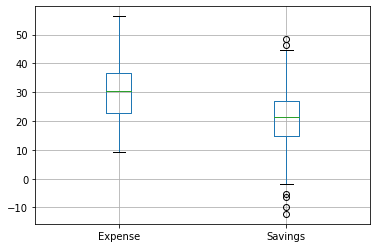

In [1535]:
IMF_Merge.boxplot()

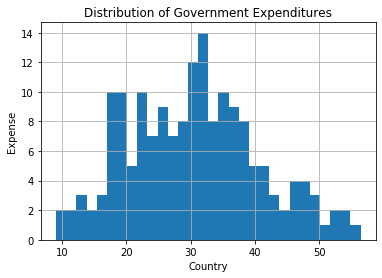

In [1536]:
# Distribution of Expense
IMF_Merge.hist(column = 'Expense', bins = 30, figsize = (6, 4))
plt.xlabel('Country')
plt.ylabel('Expense')
plt.title('Distribution of Government Expenditures')
plt.show()

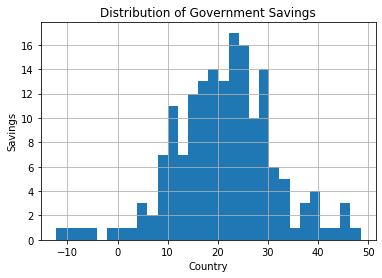

In [1537]:
# Distribution of Expense
IMF_Merge.hist(column = 'Savings', bins = 30, figsize = (6, 4))
plt.xlabel('Country')
plt.ylabel('Savings')
plt.title('Distribution of Government Savings')
plt.show()

###2.7.2 WorldEnvData

In [1538]:
WorldEnvData.dtypes

Country                     object
accessibility_to_cities    float64
tree_canopy_cover          float64
rain_mean_annual           float64
temp_mean_annual           float64
cloudiness                 float64
dtype: object

Drop unused columns

#### 2.7.2.1 Examine for Outliers

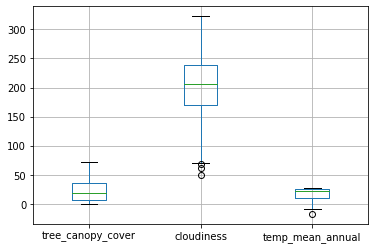

In [1539]:
TCT = pd.DataFrame(data = WorldEnvData, columns = ['tree_canopy_cover','cloudiness', 'temp_mean_annual'])
TCT.boxplot()

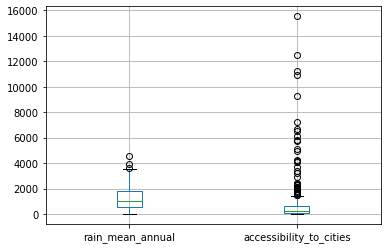

In [1540]:
RA = pd.DataFrame(data = WorldEnvData, columns = ['rain_mean_annual','accessibility_to_cities'])
RA.boxplot()

#### 2.7.2.2 Convert values to scaler and Normalize

In [0]:
# Create the Scaler object
scaler = preprocessing.StandardScaler()

In [1542]:
WEDS = scaler.fit_transform(WorldEnvData[['rain_mean_annual', 'cloudiness', 'temp_mean_annual','accessibility_to_cities','tree_canopy_cover']] )
WEDS = pd.DataFrame(WEDS, columns = ["rain_mean_annual","cloudiness","temp_mean_annual","accessibility_to_cities","tree_canopy_cover"])

WEDS_rain = WEDS["rain_mean_annual"].tolist()
World_rain_list = WorldEnvData['rain_mean_annual'].tolist()

WEDS_cloud = WEDS["cloudiness"].tolist()
World_cloud_list = WorldEnvData["cloudiness"].tolist()

WEDS_temp = WEDS["temp_mean_annual"].tolist()
World_temp_list = WorldEnvData["temp_mean_annual"].tolist()

WEDS_cities = WEDS["accessibility_to_cities"].tolist()
World_cities_list = WorldEnvData['accessibility_to_cities'].tolist()

WEDS_tree_cover = WEDS["tree_canopy_cover"].tolist()
World_tree_cover_list = WorldEnvData['tree_canopy_cover'].tolist()

WorldEnvData['rain_mean_annual'].replace(World_rain_list,WEDS_rain,inplace=True)
WorldEnvData['cloudiness'].replace(World_cloud_list,WEDS_cloud,inplace = True)
WorldEnvData['temp_mean_annual'].replace(World_temp_list,WEDS_temp,inplace = True)
WorldEnvData['accessibility_to_cities'].replace(World_cities_list,WEDS_cities,inplace = True)
WorldEnvData['tree_canopy_cover'].replace(World_tree_cover_list,WEDS_tree_cover,inplace = True)

WorldEnvData.head(n=10)


,Country,accessibility_to_cities,tree_canopy_cover,rain_mean_annual,temp_mean_annual,cloudiness
0,Russia,0.597697,-0.090750,-0.919939,-2.798999,0.186917
1,United States,-0.132247,-0.284566,-0.645950,-1.342992,-0.360306
2,Canada,1.120175,-0.078409,-0.898465,-2.863493,0.552274
3,Antarctica,NaN,NaN,NaN,NaN,1.822679
4,Indonesia,-0.197184,1.785559,1.729614,0.738576,1.649642
5,China,-0.215771,-0.559643,-0.773759,-1.370077,-0.164870
6,India,-0.397761,-0.693301,-0.139867,0.622031,-0.591278
7,Mongolia,-0.097512,-1.048251,-1.197122,-2.100624,-0.852326
8,Australia,-0.031785,-0.854702,-0.882073,0.339410,-1.312731
9,Kiribati,2.374042,-0.358027,0.510395,1.107965,0.417577


#### 2.7.2.3 Compare Normalized values to Original

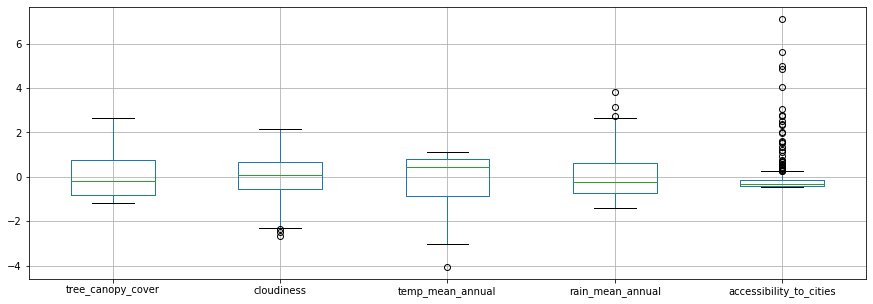

In [1543]:
TCT = pd.DataFrame(data = WorldEnvData, columns = ['tree_canopy_cover','cloudiness', 'temp_mean_annual','rain_mean_annual','accessibility_to_cities'])
TCT.boxplot(figsize=(15,5))

Box Plot showing all five transformed values together.

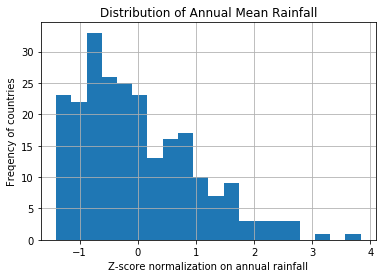

In [1544]:
# Distribution of Rainfall
WorldEnvData.hist(column = 'rain_mean_annual', bins = 20, figsize = (6, 4))
plt.xlabel('Z-score normalization on annual rainfall')
plt.ylabel('Freqency of countries')
plt.title('Distribution of Annual Mean Rainfall')
plt.show()

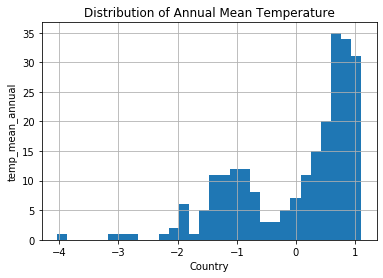

In [1545]:
# Distribution of Temperature
WorldEnvData.hist(column = 'temp_mean_annual', bins = 30, figsize = (6, 4))
plt.xlabel('Country')
plt.ylabel('temp_mean_annual')
plt.title('Distribution of Annual Mean Temperature')
plt.show()

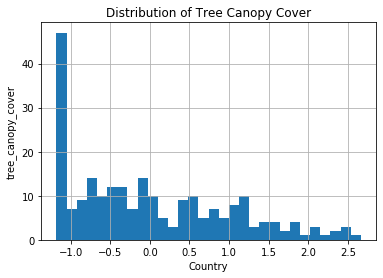

In [1546]:
# Distribution of Tree Canopy Cover
WorldEnvData.hist(column = 'tree_canopy_cover', bins = 30, figsize = (6, 4))
plt.xlabel('Country')
plt.ylabel('tree_canopy_cover')
plt.title('Distribution of Tree Canopy Cover')
plt.show()

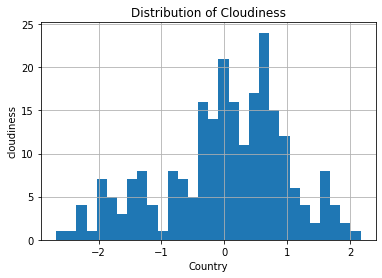

In [1547]:
# Distribution of Cloudiness
WorldEnvData.hist(column = 'cloudiness', bins = 30, figsize = (6, 4))
plt.xlabel('Country')
plt.ylabel('cloudiness')
plt.title('Distribution of Cloudiness')
plt.show()

## 2.7.3 Country Profile

#### 2.7.3.1 Examine for Outliers

In [1548]:
list(CtProfile.columns)

['country',
 'Population in thousands (2017)',
 'GDP per capita (current US$)',
 'Unemployment (% of labour force)',
 'Urban population (% of total population)',
 'Refugees and others of concern to UNHCR (in thousands)',
 'Infant mortality rate (per 1000 live births',
 'Health: Total expenditure (% of GDP)',
 'Education: Government expenditure (% of GDP)',
 'Mobile-cellular subscriptions (per 100 inhabitants)',
 'Individuals using the Internet (per 100 inhabitants)',
 'International migrant stock % Total Population',
 'Urban Population using improved sanitation facilities %',
 'Rural Population using improved sanitation facilities %',
 'Life Expectancy At Birth Females Years',
 'Life Expectancy At Birth Males Years',
 'Tertiary gross enrol female',
 'Tertiary gross enrol male',
 'CO2 emissions (tons per capita)']

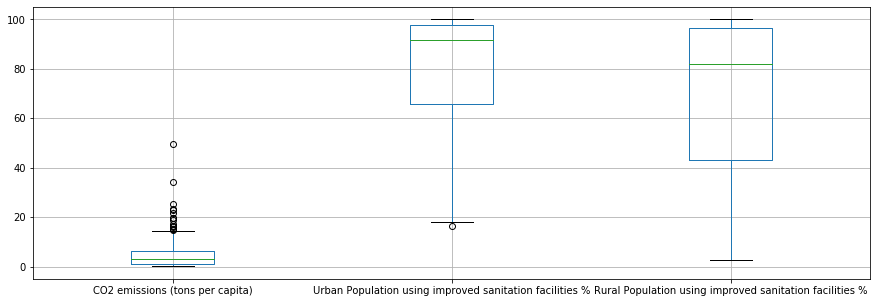

In [1549]:
Health = pd.DataFrame(data =CtProfile, columns = ['CO2 emissions (tons per capita)', 'Urban Population using improved sanitation facilities %','Rural Population using improved sanitation facilities %'])
Health.boxplot(figsize=(15,5))

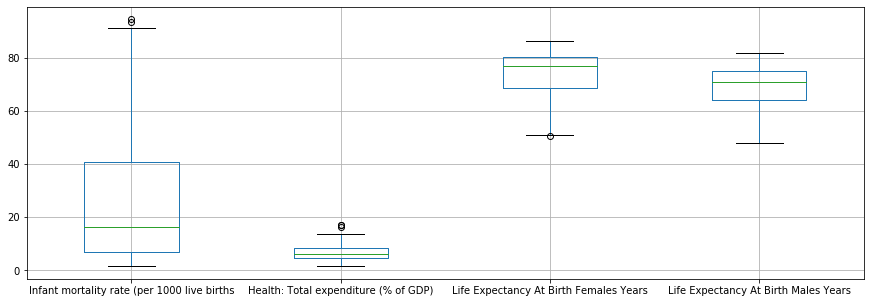

In [1550]:
Health1 = pd.DataFrame(data =CtProfile, columns = ['Infant mortality rate (per 1000 live births','Health: Total expenditure (% of GDP)', 'Life Expectancy At Birth Females Years', 'Life Expectancy At Birth Males Years'])
Health1.boxplot(figsize=(15,5))

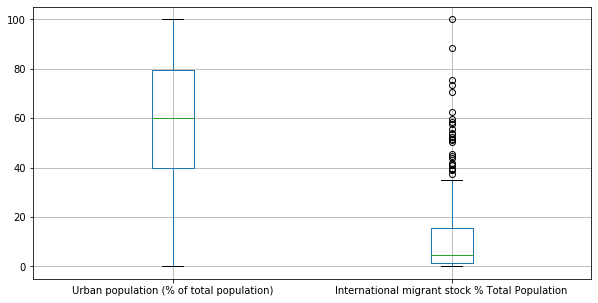

In [1551]:
Dem = pd.DataFrame(data =CtProfile, columns = ['Urban population (% of total population)', 'International migrant stock % Total Population'])
Dem.boxplot(figsize=(10,5))

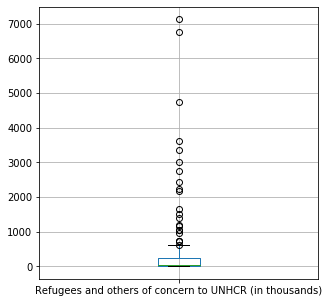

In [1552]:
Dem1 = pd.DataFrame(data =CtProfile, columns = ['Refugees and others of concern to UNHCR (in thousands)'])
Dem1.boxplot(figsize=(5,5))

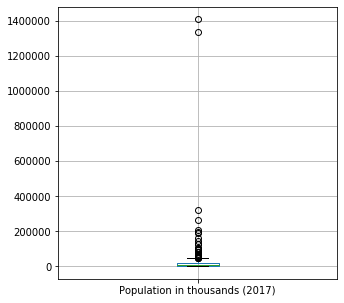

In [1553]:
Dem2 = pd.DataFrame(data =CtProfile, columns = ['Population in thousands (2017)'])
Dem2.boxplot(figsize=(5,5))

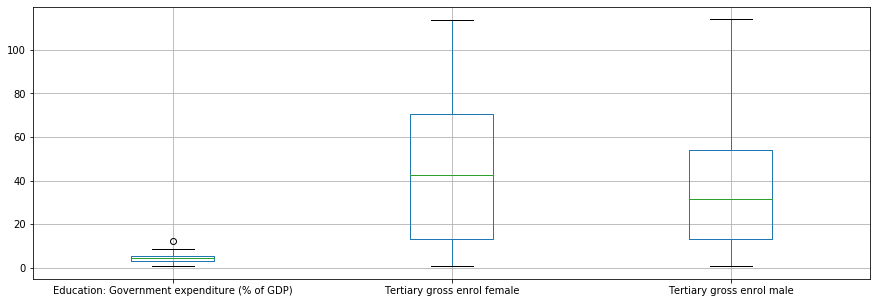

In [1554]:
Ed = pd.DataFrame(data =CtProfile, columns = ['Education: Government expenditure (% of GDP)','Tertiary gross enrol female', 'Tertiary gross enrol male'])
Ed.boxplot(figsize=(15,5))

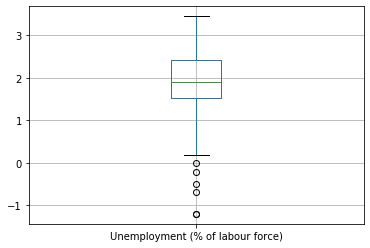

In [1555]:
Uemp = pd.DataFrame((np.log(CtProfile['Unemployment (% of labour force)'])))
Uemp.boxplot()

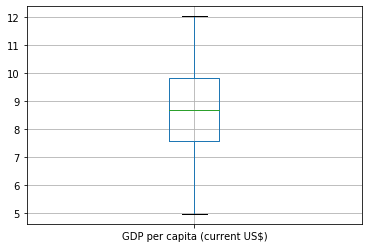

In [1556]:
GDP = pd.DataFrame((np.log(CtProfile['GDP per capita (current US$)'])))
GDP.boxplot()

#### 2.7.3.2 Apply Outlier Corrections

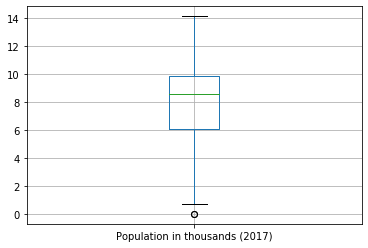

In [1557]:
# Convert Population in thousands value.
CT_Pop_Log = pd.DataFrame(np.log(CtProfile['Population in thousands (2017)'])) 
CT_Pop = CT_Pop_Log['Population in thousands (2017)'].tolist()
CT_Pop_List = CtProfile['Population in thousands (2017)'].tolist()
CtProfile['Population in thousands (2017)'].replace(CT_Pop_List,CT_Pop,inplace=True)

df = pd.DataFrame(CtProfile['Population in thousands (2017)'])
df.boxplot()

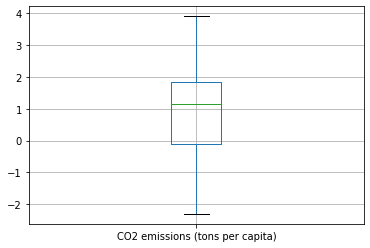

In [1558]:
#Apply log corrections to attributes that have a lot of outliers.

# Convert CO2 value.
CT_CO2_Log = pd.DataFrame(np.log(CtProfile['CO2 emissions (tons per capita)'])) 
CT_CO2 = CT_CO2_Log['CO2 emissions (tons per capita)'].tolist()
CT_CO2_List = CtProfile['CO2 emissions (tons per capita)'].tolist()
CtProfile['CO2 emissions (tons per capita)'].replace(CT_CO2_List,CT_CO2,inplace=True)

df = pd.DataFrame(CtProfile['CO2 emissions (tons per capita)'])
df.boxplot()

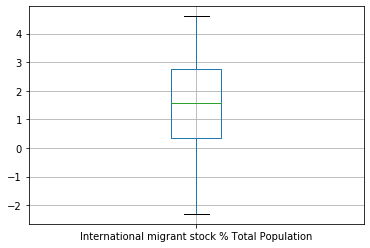

In [1559]:
# Convert International Migrant value.
CT_Mig_Log = pd.DataFrame(np.log(CtProfile['International migrant stock % Total Population'])) 
CT_Mig = CT_Mig_Log['International migrant stock % Total Population'].tolist()
CT_Mig_List = CtProfile['International migrant stock % Total Population'].tolist()
CtProfile['International migrant stock % Total Population'].replace(CT_Mig_List,CT_Mig,inplace=True)

df = pd.DataFrame(CtProfile['International migrant stock % Total Population'])
df.boxplot()

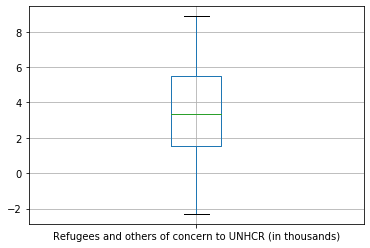

In [1560]:
# Convert Refugees and others of concern to UNHCR (in thousands) value.
CT_Ref_Log = pd.DataFrame(np.log(CtProfile['Refugees and others of concern to UNHCR (in thousands)'])) 
CT_Ref = CT_Ref_Log['Refugees and others of concern to UNHCR (in thousands)'].tolist()
CT_Ref_List = CtProfile['Refugees and others of concern to UNHCR (in thousands)'].tolist()
CtProfile['Refugees and others of concern to UNHCR (in thousands)'].replace(CT_Ref_List,CT_Ref,inplace=True)

df = pd.DataFrame(CtProfile['Refugees and others of concern to UNHCR (in thousands)'])
df.boxplot()

# **3 Database Section**



## **3.1 Create SQLite3 Database**

In [1561]:
try:
    conn = sqlite3.connect("WorldHappiness.db")
    print('Database created successfully!')
except Exception as e:
    print('Database could not be created - ' + str(e))

Database created successfully!


## **3.2 Create Tables**

### **3.2.1 World Happiness 2017**

In [1562]:
# Drop table here in case entire file it reprocessed.
#
conn = sqlite3.connect("WorldHappiness.db")
try:
    conn.execute('Drop table World_Happiness_2017')
    print('World_Happiness_2017 table dropped successfully!')
except Exception as e:
    print('World_Happiness_2017 table was not dropped - Error: ' + str(e))
finally:
    conn.close()

World_Happiness_2017 table dropped successfully!


In [1563]:
conn = sqlite3.connect("WorldHappiness.db")
try:
    conn.execute(''' 
    Create Table World_Happiness_2017
    (
      COUNTRY                       VARCHAR(50)   NOT NULL,
	    HAPPINESS_RANK                INTEGER       NOT NULL,
	    HAPPINESS_SCORE               REAL          NOT NULL,
	    WHISKER_HIGH                  REAL          NOT NULL,
	    WHISKER_LOW                   REAL          NOT NULL,
      ECONOMY_GDP_PER_CAPITA        REAL          NOT NULL,
	    FAMILY                        REAL          NOT NULL,
      HEALTH_LIFE_EXPECTANCY        REAL          NOT NULL,
	    FREEDOM                       REAL          NOT NULL,
      GENEROSITY                    REAL          NOT NULL,
	    TRUST_GOVERNMENT_CORRUPTION   REAL          NOT NULL,
	    DYSTOPIA_RESIDUAL             REAL          NOT NULL,
      CONSTRAINT PK_WORLD_HAPPINESS_2017 PRIMARY KEY (Country)
    );''')
    print('Table World_Happiness_2017 Created successfully!')
except Exception as e:
    print('Table World_Happiness_2017 could not be created - Error: ' + str(e))
finally:
    conn.close()


Table World_Happiness_2017 Created successfully!


### **3.2.2 World Environmental Data**

In [1564]:
# Drop table here in case entire file it reprocessed.
#
conn = sqlite3.connect("WorldHappiness.db")
try:
    conn.execute('Drop table World_Environmental_Data')
    print('World_Environmental_Data table dropped successfully!')
except Exception as e:
    print('World_Environmental_Data table was not dropped - Error: ' + str(e))
finally:
    conn.close()

World_Environmental_Data table dropped successfully!


In [1565]:
conn = sqlite3.connect("WorldHappiness.db")

try:
    conn.execute(''' 
    Create Table World_Environmental_Data
    (
      COUNTRY                   VARCHAR2(50)  NOT NULL,
	    ACCESSIBILITY_TO_CITIES		REAL          NULL,
	    TREE_CANOPY_COVER         REAL          NULL,
	    RAIN_MEAN_ANNUAL          REAL          NULL,
	    TEMP_MEAN_ANNUAL          REAL          NULL,
	    CLOUDINESS                REAL          NULL,
      CONSTRAINT PK_WORLD_ENVIRONMENTAL_DATA PRIMARY KEY (Country),
      FOREIGN KEY (COUNTRY) REFERENCES World_Happiness_2017(COUNTRY)
    );''')
    print('Table World_Environmental_Data Created successfully!')
except Exception as e:
    print('Table World_Environmental_Data could not be created - Error: ' + str(e))
finally:
    conn.close()

Table World_Environmental_Data Created successfully!


### **3.2.3 Country Profile Variables**

In [1566]:
# Drop table here in case entire file it reprocessed.
#
conn = sqlite3.connect("WorldHappiness.db")
try:
    conn.execute('Drop table Country_Profile_Variables')
    print('Country_Profile_Variables table dropped successfully!')
except Exception as e:
    print('Country_Profile_Variables table was not dropped - Error: ' + str(e))
finally:
    conn.close()

Country_Profile_Variables table dropped successfully!


In [1567]:
conn = sqlite3.connect("WorldHappiness.db")

try:
    conn.execute('''Create Table Country_Profile_Variables
    (
	    COUNTRY                                                       VARCHAR(50) NOT NULL,
	    POPULATION_IN_THOUSANDS_2017                                  INTEGER     NULL,
	    GDP_PER_CAPITA_CURRENT_US                                     REAL        NULL,
	    UNEMPLOYMENT_OF_LABOUR_FORCE                                  REAL				NULL,
	    URBAN_POPULATION_OF_TOTAL_POPULATION                          REAL        NULL,
	    REFUGEES_AND_OTHERS_OF_CONCERN_TO_UNHCR_IN_THOUSANDS          REAL				NULL,
	    INFANT_MORTALITY_RATE_PER_1000_LIVE_BIRTHS                    REAL				NULL,
	    HEALTH_TOTAL_EXPENDITURE_OF_GDP                               REAL        NULL,
	    EDUCATION_GOVERNMENT_EXPENDITURE_OF_GDP                       REAL				NULL,
	    MOBILE_CELLULAR_SUBSCRIPTIONS_PER_100_INHABITANTS             REAL				NULL,
	    INDIVIDUALS_USING_THE_INTERNET_PER_100_INHABITANTS            INTEGER     NULL,
	    INTERNATIONAL_MIGRANT_STOCK_OF_TOTAL_POP                  		REAL				NULL,
			POP_USING_IMPROVED_SANITATION_FACILITIES_URBAN          			REAL 				NULL,
			POP_USING_IMPROVED_SANITATION_FACILITIES_RURAL								REAL				NULL,
			LIFE_EXPECTANCY_AT_BIRTH_FEMALES_YEARS												REAL				NULL,
			LIFE_EXPECTANCY_AT_BIRTH_MALES_YEARS                  				REAL				NULL,
			TERTIARY_GROSS_ENROL_FEMALE																		REAL				NULL,
			TERTIARY_GROSS_ENROL_MALE																			REAL				NULL,
			CO2_EMISSIONS_PER_CAPITA																			REAL				NULL,
			CONSTRAINT PK_Country_Profile_Variables PRIMARY KEY (Country),
      FOREIGN KEY (COUNTRY) REFERENCES World_Happiness_2017(COUNTRY)
    );''')
    print('Table Country_Profile_Variables Created successfully!')
except Exception as e:
    print('Table Country_Profile_Variables could not be created - Error: ' + str(e))
finally:
    conn.close()

Table Country_Profile_Variables Created successfully!


### **3.2.4 IMF Combined Data Table**

In [1568]:
# Drop table here in case entire file it reprocessed.
#
conn = sqlite3.connect("WorldHappiness.db")
try:
    conn.execute('Drop table IMF_Combined_Data_2017')
    print('IMF_Combined_Data_2017 table dropped successfully!')
except Exception as e:
    print('IMF_Combined_Data_2017 table was not dropped - Error: ' + str(e))
finally:
    conn.close()

IMF_Combined_Data_2017 table dropped successfully!


In [1569]:
conn = sqlite3.connect("WorldHappiness.db")

try:
    conn.execute('''Create Table IMF_COMBINED_DATA_2017
    (
	    COUNTRY VARCHAR(50) NOT NULL,
      EXPENSE REAL        NOT NULL,
	    SAVINGS REAL        NOT NULL,
      UNITS   VARCHAR(50) NOT NULL,
	    CONSTRAINT PK_IMF_GROSS_NATIONAL_SAVINGS_2017 PRIMARY KEY (Country),
      FOREIGN KEY (COUNTRY) REFERENCES World_Happiness_2017(COUNTRY)
    );''')
    print('Table IMF_Combined_Data_2017 Created successfully!')
except Exception as e:
    print('Table IMF_Combined_Data_2017 could not be created - Error: ' + str(e))
finally:
    conn.close()

Table IMF_Combined_Data_2017 Created successfully!


### **3.2.5 Country/Region Reference Table**

In [1570]:
# Drop table here in case entire file it reprocessed.
#
conn = sqlite3.connect("WorldHappiness.db")
try:
    conn.execute('Drop table Country_Region')
    print('Country_Region table dropped successfully!')
except Exception as e:
    print('Country_Region table was not dropped - Error: ' + str(e))
finally:
    conn.close()

Country_Region table dropped successfully!


In [1571]:
conn = sqlite3.connect("WorldHappiness.db")

try:
    conn.execute('''Create Table Country_Region
    (
	    COUNTRY VARCHAR(50) NOT NULL,
	    REGION  VARCHAR(50) NOT NULL,
	    CONSTRAINT PK_Country_Region PRIMARY KEY (Country,Region),
      FOREIGN KEY (COUNTRY) REFERENCES World_Happiness_2017(COUNTRY)
    );''')
    print('Table IMF_Gross_National_Savings_2017 Created successfully!')
except Exception as e:
    print('Table IMF_Gross_National_Savings_2017 could not be created - Error: ' + str(e))
finally:
    conn.close()

Table IMF_Gross_National_Savings_2017 Created successfully!


## **3.3 Load Data**

### **3.3.1 Load WorldHappiness 2017 data**

In [1572]:
wh17_list = worldhappy17.values.tolist()

conn = sqlite3.connect("WorldHappiness.db")

cursor = conn.cursor()

try:
    cursor.executemany(''' 
    INSERT INTO World_Happiness_2017 (COUNTRY, HAPPINESS_RANK, HAPPINESS_SCORE, WHISKER_HIGH, WHISKER_LOW, ECONOMY_GDP_PER_CAPITA, FAMILY, HEALTH_LIFE_EXPECTANCY, FREEDOM, GENEROSITY, TRUST_GOVERNMENT_CORRUPTION, DYSTOPIA_RESIDUAL)
    values (?,?,?,?,?,?,?,?,?,?,?,?)''', wh17_list)
    conn.commit()
    print('World_Happiness_2017 data loaded successfully!')
except Exception as e:
  print('World_Happiness_2017 data could not be loaded into table - Error: ' + str(e))
finally:
    conn.close()

World_Happiness_2017 data loaded successfully!


In [1573]:
# Data Load Check
conn = sqlite3.connect("WorldHappiness.db")
cur = conn.cursor()
cur.execute("select count(*) FROM World_Happiness_2017")
print("World_Happiness_2017 Rows Loaded = %3d" %(cur.fetchone()[0]))

World_Happiness_2017 Rows Loaded = 155


### **3.3.2 Load World Environment Data**

In [1574]:
wed_list = WorldEnvData.values.tolist()

conn = sqlite3.connect("WorldHappiness.db")

cursor = conn.cursor()

try:
    cursor.executemany(''' 
    INSERT INTO World_Environmental_Data (COUNTRY, ACCESSIBILITY_TO_CITIES, TREE_CANOPY_COVER, RAIN_MEAN_ANNUAL, TEMP_MEAN_ANNUAL, CLOUDINESS)
      values (?,?,?,?,?,?)''', wed_list)
    conn.commit()
    print('World_Environmental_Data data loaded successfully!')
except Exception as e:
  print('World_Environmental_Data data could not be loaded into table - Error: ' + str(e))
finally:
    conn.close()

World_Environmental_Data data loaded successfully!


In [1575]:
# Data Load Check
conn = sqlite3.connect("WorldHappiness.db")
cur = conn.cursor()
cur.execute("select count(*) FROM World_Environmental_Data")
print("World_Environmental_Data Rows Loaded = %3d" %(cur.fetchone()[0]))

World_Environmental_Data Rows Loaded = 243


### **3.3.3 Load Country Profile Variables**


In [1576]:
CPV_List = CtProfile.values.tolist()

conn = sqlite3.connect("WorldHappiness.db")

cursor = conn.cursor()

try:
    cursor.executemany(''' 
    INSERT INTO Country_Profile_Variables (COUNTRY, POPULATION_IN_THOUSANDS_2017, GDP_PER_CAPITA_CURRENT_US, UNEMPLOYMENT_OF_LABOUR_FORCE,
	                                         URBAN_POPULATION_OF_TOTAL_POPULATION, REFUGEES_AND_OTHERS_OF_CONCERN_TO_UNHCR_IN_THOUSANDS,
	                                         INFANT_MORTALITY_RATE_PER_1000_LIVE_BIRTHS, HEALTH_TOTAL_EXPENDITURE_OF_GDP, EDUCATION_GOVERNMENT_EXPENDITURE_OF_GDP,
	                                         MOBILE_CELLULAR_SUBSCRIPTIONS_PER_100_INHABITANTS, INDIVIDUALS_USING_THE_INTERNET_PER_100_INHABITANTS,
	                                         INTERNATIONAL_MIGRANT_STOCK_OF_TOTAL_POP, POP_USING_IMPROVED_SANITATION_FACILITIES_URBAN,
		                                       POP_USING_IMPROVED_SANITATION_FACILITIES_RURAL, LIFE_EXPECTANCY_AT_BIRTH_FEMALES_YEARS, LIFE_EXPECTANCY_AT_BIRTH_MALES_YEARS,
                                           TERTIARY_GROSS_ENROL_FEMALE, TERTIARY_GROSS_ENROL_MALE, CO2_EMISSIONS_PER_CAPITA)
    values (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)''', CPV_List)
    conn.commit()
    print('Country_Profile_Variables data loaded successfully!')
except Exception as e:
  print('Country_Profile_Variables data could not be loaded into table - Error: ' + str(e))
finally:
    conn.close()

Country_Profile_Variables data loaded successfully!


In [1577]:
# Data Load Check - can be deleted 
conn = sqlite3.connect("WorldHappiness.db")
cur = conn.cursor()
cur.execute("select count(*) FROM Country_Profile_Variables")
print("Country_Profile_Variables Rows Loaded = %3d" %cur.fetchone()[0])

Country_Profile_Variables Rows Loaded = 229


### **3.3.4 Load Combined IMF Data 2017**

In [1578]:
IMF_List = IMF_Merge.values.tolist()

conn = sqlite3.connect("WorldHappiness.db")

cursor = conn.cursor()

try:
    cursor.executemany(''' 
    INSERT INTO IMF_Combined_Data_2017 (COUNTRY, EXPENSE, SAVINGS, UNITS)
    values (?,?,?,?)''', IMF_List)
    conn.commit()
    print('IMF_Combined_Data_2017 data loaded successfully!')
except Exception as e:
  print('IMF_Combined_Data_2017 data could not be loaded into table - Error: ' + str(e))
finally:
    conn.close()

IMF_Combined_Data_2017 data loaded successfully!


In [1579]:
# Data Load Check - can be deleted 
conn = sqlite3.connect("WorldHappiness.db")
cur = conn.cursor()
cur.execute("select count(*) FROM IMF_Combined_Data_2017")
print("IMF_Combined_Data_2017 Rows Loaded = %3d" %cur.fetchone()[0])

IMF_Combined_Data_2017 Rows Loaded = 171


### **3.3.5 Load Country Region Reference Table**

In [1580]:
CR_list = CtRg.values.tolist()

conn = sqlite3.connect("WorldHappiness.db")

cursor = conn.cursor()

try:
    cursor.executemany(''' 
    INSERT INTO Country_Region (COUNTRY, REGION)
    values (?,?)''', CR_list)
    conn.commit()
    print('Country/Region data loaded successfully!')
except Exception as e:
  print('Country/Region data could not be loaded into table - Error: ' + str(e))
finally:
    conn.close()

Country/Region data loaded successfully!


In [1581]:
# Data Load Check - can be deleted 
conn = sqlite3.connect("WorldHappiness.db")
cur = conn.cursor()
cur.execute("select count(*) FROM Country_Region")
print("Country_Region Rows Loaded = %3d" %cur.fetchone()[0])

Country_Region Rows Loaded = 157


# ***4 Data Query Selections***
---

## *4.1 - Environmental Analysis*

In [0]:
pd.set_option('display.max_columns', None)

### 4.1.1 - Analysis Query

In [0]:
# 
# Environmental Analysis
#
# World Happiness Table
#   Country
#   Score
#
# World_Environmental_Data
#   rain_mean_annual
#   cloudiness
#   temp_mean_annual
#   tree_canopy_cover
#   ACCESSIBILITY_TO_CITIES
#
# Country_Profile_Variables
#   CO2_EMISSIONS_PER_CAPITA
#
# Country_Region
#   Region
#
#
conn = sqlite3.connect("WorldHappiness.db")

try:

  df_q1= pd.read_sql_query('''select wh.Country,
                                    cr.Region,
                                    wh.Happiness_Score AS Score, 
                                    wed.rain_mean_annual AS Rain, 
                                    wed.cloudiness AS Clouds, 
                                    wed.temp_mean_annual AS Temp, 
                                    wed.tree_canopy_cover,
		                                cp.CO2_EMISSIONS_PER_CAPITA AS CO2,
                                    wed.ACCESSIBILITY_TO_CITIES as CityAccess
                                from World_Happiness_2017 wh JOIN World_Environmental_Data wed on (wh.Country = wed.Country)
	                                  JOIN Country_Profile_Variables cp on (wh.country=cp.country)
                                    JOIN country_region cr on (cr.COUNTRY=wh.Country) 
                            ''',conn)
except Exception as e:
  print('Could not execute query - Error: ' + str(e))
finally:
  conn.close()

### 4.1.2 - Results Graph

In [1584]:
#
# Showing a bar chart of the Score, CO2 and temperature
#
x = df_q1["REGION"]
y = df_q1["Score"]
y1 = df_q1["CO2"]
y2 = df_q1["Temp"]

fig = go.Figure()
fig.add_trace(go.Histogram(y=y, x=x, histfunc='avg', name="Score"))
fig.add_trace(go.Histogram(histfunc="avg", y=y1, x=x, name="CO2"))
fig.add_trace(go.Histogram(histfunc="avg", y=y2, x=x, name = "Temp"))
fig.update_layout(title_text='Relationship Between World Happiness Score, Standardized CO2 and Temperature')
fig.show()

In [1585]:
fig = px.scatter(df_q1, x="Score", y="Temp", color="REGION")
fig.update_layout(
    title_text='Relationship Between Happiness Score and Temperature by Region'
)
fig.show()

In [1586]:
fig = px.scatter(df_q1, x="Score", y="Clouds", color="REGION")
fig.update_layout(
    title_text='Relationship Between Happiness Score and Cloud Cover by Region'
)
fig.show()

In [1587]:
fig = px.scatter(df_q1, y="Score", x="Rain", color="REGION")
fig.update_layout(
    title_text='Relationship Between Happiness Score and Rain by Region'
)
fig.show()

In [1588]:
fig = go.Figure()
fig.add_trace(go.Scatter( y=df_q1["Score"],
                    mode='lines',
                    name='Score'))
fig.add_trace(go.Scatter(y=df_q1["TREE_CANOPY_COVER"],
                    mode='lines+markers',
                    name='Tree Cover'))
fig.update_layout(
    title_text='Tree Cover and Happiness Score'
)
fig.show()

In [1589]:
fig = px.scatter(df_q1, x="Score", y="CityAccess", color="REGION")
fig.update_layout(
    title_text='Relationship Between Happiness Score and Normialized Accessibility to Cities by Region'
)
fig.show()

## *4.2 - Financial Analysis*

### 4.2.1 - Analysis Query - Version 1


In [0]:
#
# Financial Analysis - Version 1 - Grouped by Region
#
# World Happiness Table
#   Country
#   Score
#
# IMF_COMBINED_DATA_2017
#   Expense
#   Savings
#
# Country_Profile_Variables
#   GDP_per_capita_current_US
#   Unemployment_of_labour_force
#
# Country_Region
#   Region
conn = sqlite3.connect("WorldHappiness.db")

try:

  df_q2= pd.read_sql_query('''select wh.Country,
                                    wh.Happiness_Score as Score,
                                    cr.Region, 
                                    imf.Expense, 
                                    imf.Savings,
                                    cp.GDP_per_capita_current_US as GDP, 
                                    cp.Unemployment_of_labour_force as UNEMPLOYMENT
                                FROM World_Happiness_2017 wh JOIN IMF_COMBINED_DATA_2017 imf on (wh.country=imf.country)
	                                    JOIN Country_Profile_Variables cp on (wh.country=cp.country)
                                      JOIN  Country_Region cr on (cr.Country = wh.country)
                                      GROUP BY cr.region
                                      ORDER BY Score
                          ''',conn)
except Exception as e:
  print('Could not execute query - Error: ' + str(e))
finally:
    conn.close()

### 4.2.2 - Results Graph - Version 1

In [1591]:
x = df_q2["REGION"]
y = df_q2["Score"]
y1 = df_q2["EXPENSE"]
y2 = df_q2["SAVINGS"]
y3 = df_q2["GDP"]
y4 = df_q2["UNEMPLOYMENT"]

fig = go.Figure()
fig.add_trace(go.Histogram(y=y, x=x, histfunc='avg', name="Score"))
fig.add_trace(go.Histogram(histfunc="avg", y=y1, x=x, name="EXPENSE"))
fig.add_trace(go.Histogram(histfunc="avg", y=y2, x=x, name = "SAVINGS"))
fig.add_trace(go.Histogram(histfunc="avg", y=y4, x=x, name = "UNEMPLOYMENT"))

fig.update_layout(title_text='Relationship Between World Happiness Score, Expense and Savings Ordered By Score')
fig.show()

### 4.2.3 - Analysis Query - Version 2

In [0]:
#
# Financial Analysis - Version 2 - Not Grouped By Region 
#
# World Happiness Table
#   Country
#   Score
#
# IMF_COMBINED_DATA_2017
#   Expense
#   Savings
#
# Country_Profile_Variables
#   GDP_per_capita_current_US
#   Unemployment_of_labour_force
#
# Country_Region
#   Region
#
#
conn = sqlite3.connect("WorldHappiness.db")

try:

  df_q22= pd.read_sql_query('''select wh.Country,
                                    wh.Happiness_Score as Score,
                                    cr.Region, 
                                    imf.Expense, 
                                    imf.Savings,
                                    cp.GDP_per_capita_current_US as GDP, 
                                    cp.Unemployment_of_labour_force as UNEMPLOYMENT
                                FROM World_Happiness_2017 wh JOIN IMF_COMBINED_DATA_2017 imf on (wh.country=imf.country)
	                                    JOIN Country_Profile_Variables cp on (wh.country=cp.country)
                                      JOIN  Country_Region cr on (cr.Country = wh.country)
                          ''',conn)
except Exception as e:
  print('Could not execute query - Error: ' + str(e))
finally:
    conn.close()

### 4.2.4 - Results Graph - Version 2

In [1593]:
fig = px.scatter(df_q22, x="Score", y="GDP", color="REGION")
fig.update_layout(
    title_text='Relationship Between Happiness Score and GDP by Region'
)
fig.show()

## *4.3 - Technology Analysis*

### 4.3.1 - Analysis Query

In [0]:
#
# Technology Analysis
#
# World Happiness Table
#   Country
#   Score
#
# Country_Profile_Variables
#   MOBILE_CELLULAR_SUBSCRIPTIONS_PER_100_INHABITANTS
#   INDIVIDUALS_USING_THE_INTERNET_PER_100_INHABITANTS
#
# Country_Region
#   Region
#
#
conn = sqlite3.connect("WorldHappiness.db")

try:

  df_q3= pd.read_sql_query('''select wh.Country,
                                    cr.Region,
                                    wh.Happiness_Score AS SCORE, 
                                    cp.MOBILE_CELLULAR_SUBSCRIPTIONS_PER_100_INHABITANTS AS CELLSUBSCRIBERS,
                                    cp.INDIVIDUALS_USING_THE_INTERNET_PER_100_INHABITANTS AS INTERNETUSERS 
		                                FROM World_Happiness_2017 wh JOIN Country_Profile_Variables cp on (wh.country=cp.country)
                                      JOIN Country_Region cr on (cr.Country = wh.Country)
                                      Group By cr.Region
                                      Order by Score
                            ''',conn)
except Exception as e:
  print('Could not execute query - Error: ' + str(e))
finally:
    conn.close()

### 4.3.2 - Results Graph

In [1595]:
x = df_q3["REGION"]
y = df_q3["SCORE"]
y1 = df_q3["CELLSUBSCRIBERS"]
y2 = df_q3["INTERNETUSERS"]

fig = go.Figure()
fig.add_trace(go.Histogram(y=y, x=x, histfunc='avg', name="SCORE"))
fig.add_trace(go.Histogram(histfunc="avg", y=y1, x=x, name="CELLSUBSCRIBERS"))
fig.add_trace(go.Histogram(histfunc="avg", y=y2, x=x, name = "INTERNETUSERS"))

## *4.4 - Financial Aggregate Analysis*

### 4.4.1 - Analysis Query

In [0]:
#
# Financial Aggregate Analysis
#
# World Happiness Table
#   Country
#   Score
#
# IMF_Combined_Data_2017
#   Expense
#   Savings
#
# Country_Profile_Variables
#   GDP_PER_CAPITA_CURRENT_US
#   UNEMPLOYMENT_OF_LABOUR_FORCE
#
# Country_Region
#   Region
#
#
conn = sqlite3.connect("WorldHappiness.db")

try:

  df_q4= pd.read_sql_query('''select wh.Country,
                                  cr.Region, 
                                  AVG(wh.HAPPINESS_SCORE) as SCORE,
                                  MIN(GNS.EXPENSE) as Min_Expense, 
                                  MAX(GNS.EXPENSE) as Max_Expense,
                                  AVG(GNS.EXPENSE) as Avg_Expense,
                                  MIN(GNS.Savings) as Min_Savings,
                                  MAX(GNS.Savings) as Max_Savings,
                                  AVG(GNS.Savings) as Avg_Savings, 
                                  AVG(cp.GDP_PER_CAPITA_CURRENT_US) as Avg_GDP_percap,  
                                  AVG(cp.UNEMPLOYMENT_OF_LABOUR_FORCE) as Avg_Unepmloyment
                                FROM World_Happiness_2017 wh JOIN IMF_Combined_Data_2017 gns on (wh.Country = gns.Country)
                                  JOIN Country_Profile_Variables cp on (wh.country = cp.Country)
                                  JOIN Country_Region cr on (wh.country=cr.country) 
                                      GROUP BY cr.Region 
                                      ORDER BY SCORE''',conn)
except Exception as e:
  print('Could not execute query - Error: ' + str(e))
finally:
    conn.close()

### 4.4.2 - Results Graph 

In [1597]:
x = df_q4["REGION"]
y = df_q4["SCORE"]
y1 = df_q4["Min_Expense"]
y2 = df_q4["Max_Expense"]
y3 = df_q4["Avg_Expense"]
y4 = df_q4["Min_Savings"]
y5 = df_q4["Max_Savings"]
y6 = df_q4["Avg_Savings"]
y7 = df_q4["Avg_Unepmloyment"]

fig = go.Figure()
fig.add_trace(go.Histogram(y=y, x=x, histfunc='avg', name="SCORE"))
fig.add_trace(go.Histogram(histfunc="avg", y=y1, x=x, name="Min Expense"))
fig.add_trace(go.Histogram(histfunc="avg", y=y2, x=x, name = "Max Expense"))
fig.add_trace(go.Histogram(histfunc="avg", y=y3, x=x, name = "Avg Expense"))
fig.add_trace(go.Histogram(histfunc="avg", y=y4, x=x, name = "Min Savings"))
fig.add_trace(go.Histogram(histfunc="avg", y=y5, x=x, name = "Min Savings"))
fig.add_trace(go.Histogram(histfunc="avg", y=y6, x=x, name = "Avg Savings"))
fig.add_trace(go.Histogram(histfunc="avg", y=y7, x=x, name = "Avg Unepmloyment"))

## *4.5 - Demographics Analysis*

### 4.5.1 - Analysis Query - Version 1

In [0]:
#
# Demographics Analysis - Not Grouped
#
# World Happiness Table
#   Country
#   Score
#
# Country_Profile_Variables
#   POPULATION_IN_THOUSANDS_2017
#   URBAN_POPULATION_OF_TOTAL_POPULATION
#   REFUGEES_AND_OTHERS_OF_CONCERN_TO_UNHCR_IN_THOUSANDS
#   INTERNATIONAL_MIGRANT_STOCK_OF_TOTAL_POP
#
# Country_Region
#   Region
#
#
conn = sqlite3.connect("WorldHappiness.db")

try:

  df_q5= pd.read_sql_query('''select wh.Country,
                                cr.Region,
                                wh.Happiness_Score as SCORE, 
                                cp.POPULATION_IN_THOUSANDS_2017 as POPULATION,               
                                cp.URBAN_POPULATION_OF_TOTAL_POPULATION as URBAN_POPULATION,
                                cp.REFUGEES_AND_OTHERS_OF_CONCERN_TO_UNHCR_IN_THOUSANDS as REFUGEE,
                                cp.INTERNATIONAL_MIGRANT_STOCK_OF_TOTAL_POP as MIGRANT
		                              FROM World_Happiness_2017 wh JOIN Country_Profile_Variables cp on (wh.country=cp.country)
                                    JOIN Country_Region cr on (cr.Country = wh.Country)
                           ''',conn)
except Exception as e:
  print('Could not execute query - Error: ' + str(e))
finally:
    conn.close()

### 4.5.2 - Results Graph - Version 1

In [1599]:
fig = px.scatter(df_q5, x="SCORE", y="POPULATION", color="REGION")
fig.update_layout(
    title_text='Relationship Between Population and Score by Region'
)
fig.show()

### 4.5.3 - Anaylsis Query - Version 2

In [0]:
#
# Demographics Analysis Version 2 - Grouped By Region
#
# World Happiness Table
#   Country
#   Score
#
# Country_Profile_Variables
#   POPULATION_IN_THOUSANDS_2017
#   URBAN_POPULATION_OF_TOTAL_POPULATION
#   REFUGEES_AND_OTHERS_OF_CONCERN_TO_UNHCR_IN_THOUSANDS
#   INTERNATIONAL_MIGRANT_STOCK_OF_TOTAL_POP
#
# Country_Region
#   Region
#
#
conn = sqlite3.connect("WorldHappiness.db")

try:

  df_q51= pd.read_sql_query('''select wh.Country,
                                cr.Region,
                                wh.Happiness_Score as SCORE, 
                                cp.POPULATION_IN_THOUSANDS_2017 as POPULATION,               
                                cp.URBAN_POPULATION_OF_TOTAL_POPULATION as URBAN_POPULATION,
                                cp.REFUGEES_AND_OTHERS_OF_CONCERN_TO_UNHCR_IN_THOUSANDS as REFUGEE,
                                cp.INTERNATIONAL_MIGRANT_STOCK_OF_TOTAL_POP as MIGRANT
		                              FROM World_Happiness_2017 wh JOIN Country_Profile_Variables cp on (wh.country=cp.country)
                                    JOIN Country_Region cr on (cr.Country = wh.Country)
                                    Group By Region
                                    Order by Score
                           ''',conn)
except Exception as e:
  print('Could not execute query - Error: ' + str(e))
finally:
    conn.close()

### 4.5.4 - Results Graph - Version 2

In [1601]:
x = df_q51["REGION"]
y = df_q51["SCORE"]
y1 = df_q51["REFUGEE"]
y2 = df_q51["MIGRANT"]

fig = go.Figure()
fig.add_trace(go.Histogram(y=y, x=x, histfunc='avg', name="SCORE"))
fig.add_trace(go.Histogram(histfunc="avg", y=y1, x=x, name="REFUGEE"))
fig.add_trace(go.Histogram(histfunc="avg", y=y2, x=x, name = "MIGRANT"))

## *4.6 - Health Analysis*

### 4.6.1 - Analysis Query - Version 1

In [0]:
#
# Health Analysis Version 1 - Grouped By Region
#
# World Happiness Table
#   Country
#   Score
#
# Country_Profile_Variables
#   HEALTH_TOTAL_EXPENDITURE_OF_GDP
#   INFANT_MORTALITY_RATE_PER_1000_LIVE_BIRTHS
#   POP_USING_IMPROVED_SANITATION_FACILITIES_URBAN
#   POP_USING_IMPROVED_SANITATION_FACILITIES_RURAL
#   LIFE_EXPECTANCY_AT_BIRTH_FEMALES_YEARS
#   LIFE_EXPECTANCY_AT_BIRTH_MALES_YEARS
#
# Country_Region
#   Region
#
#
conn = sqlite3.connect("WorldHappiness.db") 

try: 
  df_q6 = pd.read_sql_query('''select wh.Country,     
                                      cr.Region,
                                      wh.Happiness_Score as SCORE,
                                       cp.HEALTH_TOTAL_EXPENDITURE_OF_GDP AS HEALTH_GDP, 
                                       cp.INFANT_MORTALITY_RATE_PER_1000_LIVE_BIRTHS as MORT_RATE, 
                                      cp.POP_USING_IMPROVED_SANITATION_FACILITIES_URBAN as FAC_URBAN,
  	                                  cp.POP_USING_IMPROVED_SANITATION_FACILITIES_RURAL as FAC_RURAL,
	                                     cp.LIFE_EXPECTANCY_AT_BIRTH_FEMALES_YEARS as LIFE_EXP_FEMALE,
	                                     cp.LIFE_EXPECTANCY_AT_BIRTH_MALES_YEARS as LIFE_EXP_MALE
                                    FROM World_Happiness_2017 wh JOIN Country_Profile_Variables cp on (wh.country=cp.country)
                                      JOIN Country_Region cr on (cr.Country = wh.Country)
                                          Group By Region
                                          Order by Score 
                                  ''',conn)
except Exception as e: 
  print('Could not execute query - Error: ' + str(e))
finally: 
  conn.close()

### 4.6.2 - Results Graph - Version  1

In [1603]:
x = df_q6["REGION"]
y = df_q6["SCORE"]
y1 = df_q6["MORT_RATE"]
y2 = df_q6["FAC_URBAN"]
y3 = df_q6["FAC_RURAL"]
y4 = df_q6["LIFE_EXP_FEMALE"]
y5 = df_q6["LIFE_EXP_MALE"]

fig = go.Figure()
fig.add_trace(go.Histogram(y=y, x=x, histfunc='avg', name="SCORE"))
fig.add_trace(go.Histogram(histfunc="avg", y=y1, x=x, name="MORT_RATE"))
fig.add_trace(go.Histogram(histfunc="avg", y=y2, x=x, name = "FAC_URBAN"))
fig.add_trace(go.Histogram(histfunc="avg", y=y3, x=x, name = "FAC_RURAL"))
fig.add_trace(go.Histogram(histfunc="avg", y=y4, x=x, name = "LIFE_EXP_FEMALE"))
fig.add_trace(go.Histogram(histfunc="avg", y=y5, x=x, name = "LIFE_EXP_MALE"))

### 4.6.3 - Analysis Query - Version 2

In [0]:
#
# Health Analysis Version 2 - Not Grouped
#
# World Happiness Table
#   Country
#   Score
#
# Country_Profile_Variables
#   HEALTH_TOTAL_EXPENDITURE_OF_GDP
#   INFANT_MORTALITY_RATE_PER_1000_LIVE_BIRTHS
#   POP_USING_IMPROVED_SANITATION_FACILITIES_URBAN
#   POP_USING_IMPROVED_SANITATION_FACILITIES_RURAL
#   LIFE_EXPECTANCY_AT_BIRTH_FEMALES_YEARS
#   LIFE_EXPECTANCY_AT_BIRTH_MALES_YEARS
#
# Country_Region
#   Region
#
#
conn = sqlite3.connect("WorldHappiness.db") 

try: 
  df_q61 = pd.read_sql_query('''select wh.Country,     
                                      cr.Region,
                                      wh.Happiness_Score as SCORE,
                                      cp.HEALTH_TOTAL_EXPENDITURE_OF_GDP AS HEALTH_GDP, 
                                      cp.INFANT_MORTALITY_RATE_PER_1000_LIVE_BIRTHS as MORT_RATE, 
                                      cp.POP_USING_IMPROVED_SANITATION_FACILITIES_URBAN as FAC_URBAN,
  	                                  cp.POP_USING_IMPROVED_SANITATION_FACILITIES_RURAL as FAC_RURAL,
	                                    cp.LIFE_EXPECTANCY_AT_BIRTH_FEMALES_YEARS as LIFE_EXP_FEMALE,
	                                    cp.LIFE_EXPECTANCY_AT_BIRTH_MALES_YEARS as LIFE_EXP_MALE
                                    FROM World_Happiness_2017 wh JOIN Country_Profile_Variables cp on (wh.country=cp.country)
                                      JOIN Country_Region cr on (cr.Country = wh.Country)
                                  ''',conn)
except Exception as e: 
  print('Could not execute query - Error: ' + str(e))
finally: 
  conn.close()

### 4.6.4 - Results Graph - Version 2

In [1605]:
fig = px.scatter(df_q61, x="SCORE", y="HEALTH_GDP", color="REGION")
fig.update_layout(
    title_text='Relationship Between Happiness Score and Health GDP by Region'
)
fig.show()

# ***5 Spark Analysis***

---

## 5.1 Spark Query

In [1606]:
conn = sqlite3.connect("WorldHappiness.db")

try:

  df_Spark = pd.read_sql_query('''select wh.Country,
                                    cr.Region,
                                    wh.Happiness_Score AS Score, 
                                    cp.MOBILE_CELLULAR_SUBSCRIPTIONS_PER_100_INHABITANTS AS CELLSUBSCRIBERS,
                                    cp.INDIVIDUALS_USING_THE_INTERNET_PER_100_INHABITANTS AS INTERNETUSERS,
                                    imf.Expense, 
                                    imf.Savings,
                                    cp.GDP_per_capita_current_US as GDP, 
                                    cp.Unemployment_of_labour_force as UNEMPLOYMENT,
                                     
		                                
                                    wed.rain_mean_annual AS Rain, 
                                    wed.cloudiness AS Clouds, 
                                    wed.temp_mean_annual AS Temp, 
		                                cp.CO2_EMISSIONS_PER_CAPITA AS CO2,

                                    cp.LIFE_EXPECTANCY_AT_BIRTH_FEMALES_YEARS as LIFE_EXP_FEMALE,
	                                  cp.LIFE_EXPECTANCY_AT_BIRTH_MALES_YEARS as LIFE_EXP_MALE,
                                    cp.HEALTH_TOTAL_EXPENDITURE_OF_GDP AS HEALTH_GDP,
                                    cp.INFANT_MORTALITY_RATE_PER_1000_LIVE_BIRTHS as MORT_RATE,
                                    cp.INTERNATIONAL_MIGRANT_STOCK_OF_TOTAL_POP as Migrant,
                                    cp.POPULATION_IN_THOUSANDS_2017 as Pop


                                from World_Happiness_2017 wh JOIN World_Environmental_Data wed on (wh.Country = wed.Country)
                                    JOIN Country_Profile_Variables cp on (wh.country=cp.country)
                                    JOIN IMF_COMBINED_DATA_2017 imf on (wh.country=imf.country)
                                    JOIN country_region cr on (cr.COUNTRY=wh.Country) 
                            ''',conn)
except Exception as e:
  print('Could not execute query - Error: ' + str(e))
finally:
  conn.close()

df_Spark.dropna(inplace= True)

df_Spark.columns

Index(['COUNTRY', 'REGION', 'Score', 'CELLSUBSCRIBERS', 'INTERNETUSERS',
       'EXPENSE', 'SAVINGS', 'GDP', 'UNEMPLOYMENT', 'Rain', 'Clouds', 'Temp',
       'CO2', 'LIFE_EXP_FEMALE', 'LIFE_EXP_MALE', 'HEALTH_GDP', 'MORT_RATE',
       'Migrant', 'Pop'],
      dtype='object')

## 5.2 - Install Spark Libraries

In [0]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-us.apache.org/dist/spark/spark-2.4.4/spark-2.4.4-bin-hadoop2.7.tgz
!tar xf spark-2.4.4-bin-hadoop2.7.tgz
!pip install -q findspark

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.4-bin-hadoop2.7"

import findspark
findspark.init()

from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

## 5.3 - Create the Regession Sets

In [0]:
#
# Health Regression Set - Dropping columns not required.
#
df_regression1 = df_Spark.drop(['COUNTRY',
                                'REGION',
                                'CELLSUBSCRIBERS',
                                'INTERNETUSERS',
                                'EXPENSE',
                                'SAVINGS',
                                'GDP',
                                'UNEMPLOYMENT',
                                'Rain',
                                'Clouds', 
                                'Temp',
                                'CO2'], axis = 1) 

#
# Technology & Financial Regression Set - Dropping columns not required.
#
df_regression2 = df_Spark.drop(['COUNTRY',
                                'REGION',
                                'Rain', 
                                'Clouds', 
                                'Temp', 
                                'CO2',
                                'GDP',
                                'LIFE_EXP_FEMALE',
                                'LIFE_EXP_MALE',
                                'HEALTH_GDP',
                                'MORT_RATE',
                                'Migrant',
                                'Pop'], axis = 1)
#
#
# Environmental Regression Set - Dropping columns not required.
#
df_regression3 = df_Spark.drop(['COUNTRY',
                                'CELLSUBSCRIBERS',
                                'INTERNETUSERS',
                                'EXPENSE', 
                                'SAVINGS',
                                'GDP', 
                                'UNEMPLOYMENT',
                                'LIFE_EXP_FEMALE',
                                'LIFE_EXP_MALE',
                                'HEALTH_GDP',
                                'MORT_RATE',
                                'Migrant',
                                'Pop','Clouds'], axis = 1) 
#
#
# Creating unique regression sets as Spark Dataframes.
#
df_regression_Health  = spark.createDataFrame(df_regression1)
df_regression_FinTech = spark.createDataFrame(df_regression2)
df_regression_Env     = spark.createDataFrame(df_regression3)

## 5.4 - Regression Set Analysis

### 5.4.1 - Analysis 1 - Health Regression Set

In [1609]:
assembler_Health = VectorAssembler(inputCols=['LIFE_EXP_FEMALE',
	                                            'LIFE_EXP_MALE',
                                              'HEALTH_GDP',
                                              'MORT_RATE',
                                              'Migrant',
                                              'Pop'], outputCol='Attributes')
output = assembler_Health.transform(df_regression_Health)
finalized_data_Health = output.select("Attributes","Score")
finalized_data_Health.show()
train_data_Health,test_data_Health = finalized_data_Health.randomSplit([.8,.2])

+--------------------+------------------+
|          Attributes|             Score|
+--------------------+------------------+
|[82.2,78.1,10.8,3...|       7.521999836|
|[84.8,80.5,11.7,3...|       7.493999958|
|[83.8,79.7,10.4,4...|       7.315999985|
|[83.1,79.4,10.9,3...|       7.376999855|
|[83.1,79.5,11.0,4...|        7.31400013|
|[84.4,80.2,9.4,3....|        7.28399992|
|[83.7,80.0,11.9,2...|        7.28399992|
|[83.7,80.0,7.8,3....|       7.212999821|
|[83.5,78.4,11.2,3...|       7.006000042|
|[81.2,76.5,17.1,6...|       6.993000031|
|[81.7,76.7,9.3,9....|       7.078999996|
|[82.9,77.9,11.3,3...|       6.951000214|
|[78.4,71.0,8.3,15...|       6.635000229|
|[83.0,78.0,10.6,3...|       6.890999794|
|[83.0,78.7,7.8,3....|       6.977000237|
|[83.4,78.8,6.9,3....| 6.862999916000001|
|[78.9,74.0,6.3,18...|       6.578000069|
|[84.5,80.1,4.9,2....|6.5720000270000005|
|[82.8,79.0,9.1,4....|       6.714000225|
|[81.3,76.2,7.8,7....|        6.65199995|
+--------------------+------------

In [1610]:
train_data_Health.count()

100

In [1611]:
test_data_Health.count()

29

In [1612]:
regressor_Health = LinearRegression(featuresCol='Attributes', labelCol='Score')
regressor_Health = regressor_Health.fit(train_data_Health)
predict_Health = regressor_Health.evaluate(test_data_Health)
predict_Health.predictions.show()

+--------------------+------------------+------------------+
|          Attributes|             Score|        prediction|
+--------------------+------------------+------------------+
|[72.7,67.2,5.8,14...|5.9559998510000005| 5.021822686239065|
|[77.1,67.9,6.8,17...|       6.002999783| 5.260633915265065|
|[78.1,71.5,5.4,12...|               5.5| 5.787726105039856|
|[78.2,69.9,5.3,13...|              5.25| 5.690145682916795|
|[78.7,68.8,5.9,6....|       5.849999905| 5.588477566808991|
|[79.4,76.8,2.2,7....|             6.375| 5.987769392559806|
|[81.2,75.1,7.4,2....|       6.609000206| 6.017992438767183|
|[81.7,76.7,9.3,9....|       7.078999996|6.3266259758221794|
|[82.8,79.0,9.1,4....|       6.714000225| 6.704152873717589|
|[82.9,77.9,11.3,3...|       6.951000214| 6.824146459628552|
|[83.2,77.2,9.2,2....|       5.757999897| 6.363648175219102|
|[84.5,80.1,4.9,2....|6.5720000270000005| 6.591050441131519|
|[84.8,80.5,11.7,3...|       7.493999958|6.9965391979166585|
|[59.5,56.7,4.3,73...|  

### 5.4.2 - Analysis 2 - Technology & Finance Regression Set

In [1613]:
assembler_FinTech = VectorAssembler(inputCols=['CELLSUBSCRIBERS',
                                               'INTERNETUSERS',
                                               'EXPENSE',
                                               'SAVINGS',
                                               'UNEMPLOYMENT'], outputCol='Attributes')
assembler_FinTech_output = assembler_FinTech.transform(df_regression_FinTech)
finalized_data_Fintech = assembler_FinTech_output.select('Attributes','Score')
finalized_data_Fintech.show()
train_data_FinTech,test_data_FinTech = finalized_data_Fintech.randomSplit([.8,.2])

+--------------------+------------------+
|          Attributes|             Score|
+--------------------+------------------+
|[128.3,96.3,51.15...|       7.521999836|
|[142.0,88.0,32.93...|       7.493999958|
|[81.9,88.5,40.25,...|       7.315999985|
|[123.5,93.1,42.44...|       7.376999855|
|[121.8,88.2,36.17...|        7.31400013|
|[132.8,84.6,36.70...|        7.28399992|
|[130.4,90.6,47.95...|        7.28399992|
|[133.5,78.9,38.76...|       7.212999821|
|[157.4,83.9,48.98...|       7.006000042|
|[117.6,74.6,35.24...|       6.993000031|
|[150.7,59.8,20.02...|       7.078999996|
|[116.7,87.6,44.42...|       6.951000214|
|[126.6,59.1,38.47...|       6.635000229|
|[115.7,85.1,52.13...|       6.890999794|
|[103.7,80.1,26.06...|       6.977000237|
|[148.5,97.3,42.97...| 6.862999916000001|
|[85.3,57.4,25.749...|       6.578000069|
|[146.1,82.1,13.79...|6.5720000270000005|
|[125.8,92.0,38.40...|       6.714000225|
|[129.5,64.3,25.37...|        6.65199995|
+--------------------+------------

In [1614]:
train_data_FinTech.count()

107

In [1615]:
test_data_FinTech.count()

22

In [1616]:
regressor_FinTech = LinearRegression(featuresCol='Attributes', labelCol='Score')
regressor_FinTech = regressor_FinTech.fit(train_data_FinTech)
predict_FinTech = regressor_FinTech.evaluate(test_data_FinTech)
predict_FinTech.predictions.show()

+--------------------+------------------+------------------+
|          Attributes|             Score|        prediction|
+--------------------+------------------+------------------+
|[48.9,41.6,34.89,...|5.9559998510000005| 4.812810180058177|
|[92.2,45.1,38.598...|       5.822999954| 5.365384603695302|
|[96.0,53.7,33.617...|               5.5| 5.392772782669766|
|[103.7,80.1,26.06...|       6.977000237| 6.450517258067636|
|[113.2,73.1,39.78...|       5.757999897| 6.151363307873655|
|[117.6,74.6,35.24...|       6.993000031| 6.330023749373158|
|[125.0,93.3,37.41...|       5.920000076| 7.060490012465632|
|[148.7,68.0,41.23...|        5.97300005|  6.15289488830579|
|[153.6,92.9,33.45...|             6.375| 7.323749872195343|
|[157.7,69.2,33.14...| 6.168000221000001| 6.288128235906436|
|[46.5,2.2,26.8080...|       4.027999878| 4.016762848542732|
|[80.6,11.4,29.955...|       4.032000065| 4.311761736605151|
|[93.8,17.2,34.649...|       4.497000217| 3.955739839724182|
|[98.6,19.0,35.632...|  

### 5.4.3 - Analysis 3 - Environmental Regression Set

In [1617]:
assembler_Env = VectorAssembler(inputCols=['Rain',
	                                          'Temp',
                                            'CO2'], outputCol='Attributes')
outside = assembler_Env.transform(df_regression_Env)
finalized_data_Env = outside.select("Attributes","Score")
finalized_data_Env.show()
train_data_Env,test_data_Env = finalized_data_Env.randomSplit([.8,.2])

+--------------------+------------------+
|          Attributes|             Score|
+--------------------+------------------+
|[-0.5827004883733...|       7.521999836|
|[0.12399637877555...|       7.493999958|
|[-0.8984648194842...|       7.315999985|
|[-0.5183801512026...|       7.376999855|
|[0.48877962441837...|        7.31400013|
|[-0.8820731918218...|        7.28399992|
|[-0.6870499691607...|        7.28399992|
|[-1.0802210676201...|       7.212999821|
|[-0.2100808664942...|       7.006000042|
|[-0.6459500459235...|       6.993000031|
|[2.01122660698853...|       7.078999996|
|[-0.5782405913177...|       6.951000214|
|[0.60266245679767...|       6.635000229|
|[-0.4399894224170...|       6.890999794|
|[-0.1838180653862...|       6.977000237|
|[-0.3907362791715...| 6.862999916000001|
|[-0.5308915804816...|       6.578000069|
|[1.35242471703167...|6.5720000270000005|
|[-0.3043826372727...|       6.714000225|
|[-0.2122986424786...|        6.65199995|
+--------------------+------------

In [1618]:
train_data_Env.count()

102

In [1619]:
test_data_Env.count()

27

In [1620]:
regressor_Env = LinearRegression(featuresCol='Attributes', labelCol='Score')
regressor_Env = regressor_Env.fit(train_data_Env)
predict_Env = regressor_Env.evaluate(test_data_Env)
predict_Env.predictions.show()

+--------------------+-----------------+------------------+
|          Attributes|            Score|        prediction|
+--------------------+-----------------+------------------+
|[-1.3385755427537...|      6.647999763| 6.172945333392974|
|[-1.2982743699419...|6.105000018999999| 6.271261913588265|
|[-0.7804153205415...|      5.837999821| 5.039111964150569|
|[-0.7191220483440...|6.402999877999999| 5.773352970494952|
|[-0.7011261178496...|      5.568999767| 6.036588639815947|
|[-0.6575060356391...|       5.90199995| 5.824567705907203|
|[-0.6459500459235...|      6.993000031| 6.521291670481439|
|[-0.4802911409709...|6.441999912000001| 5.843020520876209|
|[-0.2100808664942...|      7.006000042|  6.20699779957225|
|[-0.0953548469260...|      5.822999954| 5.309138234746778|
|[0.12399637877555...|      7.493999958| 6.065989586324961|
|[0.38169486991039...|5.715000152999999| 5.499522210406831|
|[0.48877962441837...|       7.31400013| 6.401514690453302|
|[0.52328081966485...|      5.920000076|

# ***6 Model Assesment*** 

---

## 6.1 - Health Model


In [1621]:
coeff = regressor_Health.coefficients
intercept = regressor_Health.intercept
print("The coefficients of the model are: %a" %coeff)
print("The intercept of the model is: %f" %intercept)

The coefficients of the model are: DenseVector([0.0747, 0.036, 0.0562, 0.0079, 0.1372, 0.0805])
The intercept of the model is: -4.112512


In [1622]:
eval = RegressionEvaluator(labelCol="Score", predictionCol="prediction", metricName="rmse")

#Root Mean Square Error
rmse = eval.evaluate(predict_Health.predictions)
print("The RMSE for the Health model is RMSE: %.3f" % rmse)

# r2 - coefficient
r2 = eval.evaluate(predict_Health.predictions, {eval.metricName: "r2"})
print("The R2 for the Health model is: %.3f" %r2)

The RMSE for the Health model is RMSE: 0.557
The R2 for the Health model is: 0.746


## 6.2 Technology and Financial Model

In [1623]:
coeff = regressor_FinTech.coefficients
intercept = regressor_FinTech.intercept
print("The coefficients of the Technology & Finance model are: %a" %coeff)
print("The intercept of the Technology & Finance model is: %f" %intercept)

The coefficients of the Technology & Finance model are: DenseVector([0.002, 0.0319, -0.0029, 0.0043, -0.0442])
The intercept of the Technology & Finance model is: 3.949109


In [1624]:
eval = RegressionEvaluator(labelCol="Score", predictionCol="prediction", metricName="rmse")

rmse = eval.evaluate(predict_FinTech.predictions)
print("The RMSE for the Technology & Finance model is: %.3f" % rmse)

r2 = eval.evaluate(predict_FinTech.predictions, {eval.metricName: "r2"})
print("The R2 for the Technology & Finance model is: %.3f" %r2)

The RMSE for the Technology & Finance model is: 0.586
The R2 for the Technology & Finance model is: 0.576


## 6.3 Environment Model 

In [1625]:
coeff = regressor_Env.coefficients
intercept = regressor_Env.intercept
print("The coefficients of the model are: %a" %coeff)
print("The intercept of the Environmental model is: %f" %intercept)

The coefficients of the model are: DenseVector([0.2982, -0.1442, 0.537])
The intercept of the Environmental model is: 5.024890


In [1626]:
eval = RegressionEvaluator(labelCol="Score", predictionCol="prediction", metricName="rmse")

rmse = eval.evaluate(predict_Env.predictions)
print("The RMSE for the Environmental model is: %.3f" % rmse)

r2 = eval.evaluate(predict_Env.predictions, {eval.metricName: "r2"})
print("The R2 for the Environmental model is: %.3f" %r2)

The RMSE for the Environmental model is: 0.727
The R2 for the Environmental model is: 0.468
